In [1]:
import pymc as pm

import matplotlib 
matplotlib.rc('font', family='Malgun Gothic')  # 그림 한글 폰트 지정, 맑은 고딕
lambda_ = pm.Exponential("poisson_param", 1)
# used in the call to the next variable...
# 다음 번 변수 호출에서 사용된다
data_generator = pm.Poisson("data_generator", lambda_)
data_plus_one = data_generator + 1

In [2]:
print ("Children of ‘lambda_’: ")
print (lambda_.children)
print ("\nParents of ‘data_generator’: ")
print (data_generator.parents)
print ("\nChildren of ‘data_generator’: ")
print (data_generator.children)

Children of ‘lambda_’: 
{<pymc.distributions.new_dist_class.<locals>.new_class 'data_generator' at 0x0000023D70A0F240>}

Parents of ‘data_generator’: 
{'mu': <pymc.distributions.new_dist_class.<locals>.new_class 'poisson_param' at 0x0000023D71816278>}

Children of ‘data_generator’: 
{<pymc.PyMCObjects.Deterministic '(data_generator_add_1)' at 0x0000023D718164E0>}


In [3]:
print ("lambda_.value =", lambda_.value)
print ("data_generator.value =", data_generator.value)
print ("data_plus_one.value =", data_plus_one.value)

lambda_.value = 0.24282167208779387
data_generator.value = 0
data_plus_one.value = 1


In [4]:
lambda_1 = pm.Exponential("lambda_1", 1)  # 첫 번째 행동의 사전확률 prior on first behaviour
lambda_2 = pm.Exponential("lambda_2", 1)  # 두 번째 행동의 사전확률 prior on second behaviour
tau = pm.DiscreteUniform("tau", lower=0, upper=10)  # 행동변화에 대한 사전확률 prior on behaviour change
print ("Initialized values...")
print("lambda_1.value = %.3f" % lambda_1.value)
print("lambda_2.value = %.3f" % lambda_2.value)
print("tau.value = %.3f" % tau.value, "\n")

print(lambda_1.random(), lambda_2.random(), tau.random())

print("After calling random() on the variables...")
print("lambda_1.value = %.3f" % lambda_1.value)
print("lambda_2.value = %.3f" % lambda_2.value)
print("tau.value = %.3f" % tau.value)

Initialized values...
lambda_1.value = 0.503
lambda_2.value = 3.188
tau.value = 1.000 

0.8951353901824248 1.3982816745275541 3
After calling random() on the variables...
lambda_1.value = 0.895
lambda_2.value = 1.398
tau.value = 3.000


In [5]:
type(lambda_1 + lambda_2)

pymc.PyMCObjects.Deterministic

In [6]:
import numpy as np
n_data_points = 5  # 1장에서 70개의 데이터포인트가 있었다 in CH1 we had ~70 data points


@pm.deterministic
def lambda_(tau=tau, lambda_1=lambda_1, lambda_2=lambda_2):
    out = np.zeros(n_data_points)
    out[:tau] = lambda_1  # lambda_1은 tau이전 lambda이다
    out[tau:] = lambda_2  # lambda_2은 tau이후 lambda이다
    return out

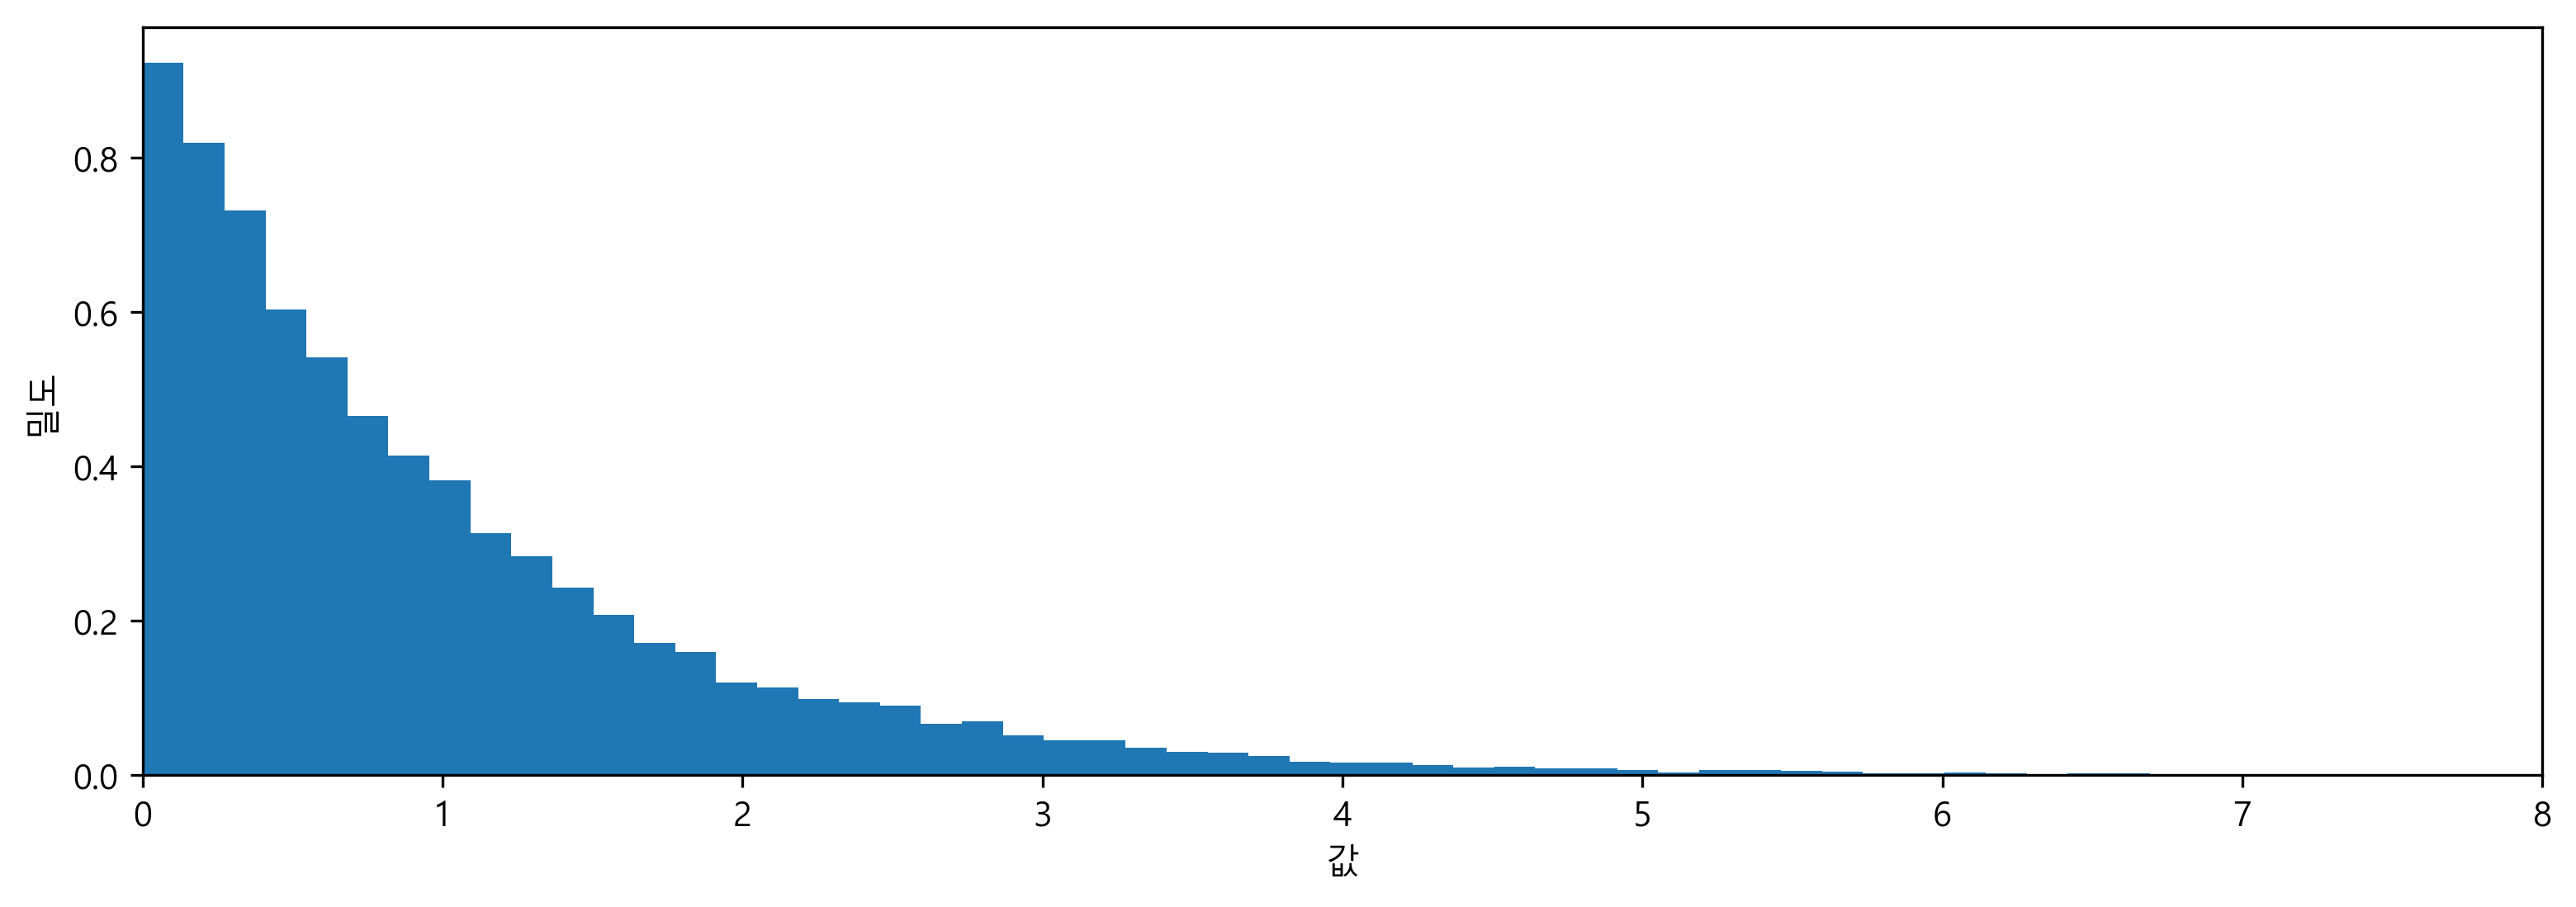

In [7]:
%matplotlib inline
from IPython.core.pylabtools import figsize
from matplotlib import pyplot as plt
figsize(12.5, 4)
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.dpi'] = 300
samples = [lambda_1.random() for i in range(20000)]
plt.hist(samples, bins=70, normed=True, histtype="stepfilled")
#plt.title("$\lambda_1$에 대한 사전확률분포")
plt.xlabel("값")
plt.ylabel("밀도")
plt.xlim(0, 8);

In [8]:
data = np.array([10, 5])
fixed_variable = pm.Poisson("fxd", 1, value=data, observed=True)
print("value: ", fixed_variable.value)
print("calling .random()")
fixed_variable.random()
print("value: ", fixed_variable.value)

value:  [10  5]
calling .random()
value:  [10  5]


In [9]:
# We're using some fake data here
# 이제부터 가상의 데이터값을 사용한다
data = np.array([10, 25, 15, 20, 35])
obs = pm.Poisson("obs", lambda_, value=data, observed=True)
print(obs.value)

[10 25 15 20 35]


In [10]:
model = pm.Model([obs, lambda_, lambda_1, lambda_2, tau])

In [11]:
tau = pm.rdiscrete_uniform(0, 80)
print(tau)

7


In [12]:
alpha = 1. / 20.
lambda_1, lambda_2 = pm.rexponential(alpha, 2)
print(lambda_1, lambda_2)

35.1827606009 26.4473193411


In [13]:
lambda_ = np.r_[ lambda_1*np.ones(tau), lambda_2*np.ones(80-tau) ]
print (lambda_)

[ 35.1827606   35.1827606   35.1827606   35.1827606   35.1827606
  35.1827606   35.1827606   26.44731934  26.44731934  26.44731934
  26.44731934  26.44731934  26.44731934  26.44731934  26.44731934
  26.44731934  26.44731934  26.44731934  26.44731934  26.44731934
  26.44731934  26.44731934  26.44731934  26.44731934  26.44731934
  26.44731934  26.44731934  26.44731934  26.44731934  26.44731934
  26.44731934  26.44731934  26.44731934  26.44731934  26.44731934
  26.44731934  26.44731934  26.44731934  26.44731934  26.44731934
  26.44731934  26.44731934  26.44731934  26.44731934  26.44731934
  26.44731934  26.44731934  26.44731934  26.44731934  26.44731934
  26.44731934  26.44731934  26.44731934  26.44731934  26.44731934
  26.44731934  26.44731934  26.44731934  26.44731934  26.44731934
  26.44731934  26.44731934  26.44731934  26.44731934  26.44731934
  26.44731934  26.44731934  26.44731934  26.44731934  26.44731934
  26.44731934  26.44731934  26.44731934  26.44731934  26.44731934
  26.447319

In [14]:
data = pm.rpoisson(lambda_)
print (data)

[37 40 38 49 48 35 45 26 21 35 23 37 23 19 22 24 25 23 31 18 19 25 21 30 30
 35 28 20 26 31 28 21 27 37 34 24 32 28 33 26 30 24 18 26 33 30 32 24 20 35
 22 34 32 29 17 24 21 26 35 18 25 26 22 30 17 31 34 41 26 38 23 30 32 31 23
 21 34 32 26 26]


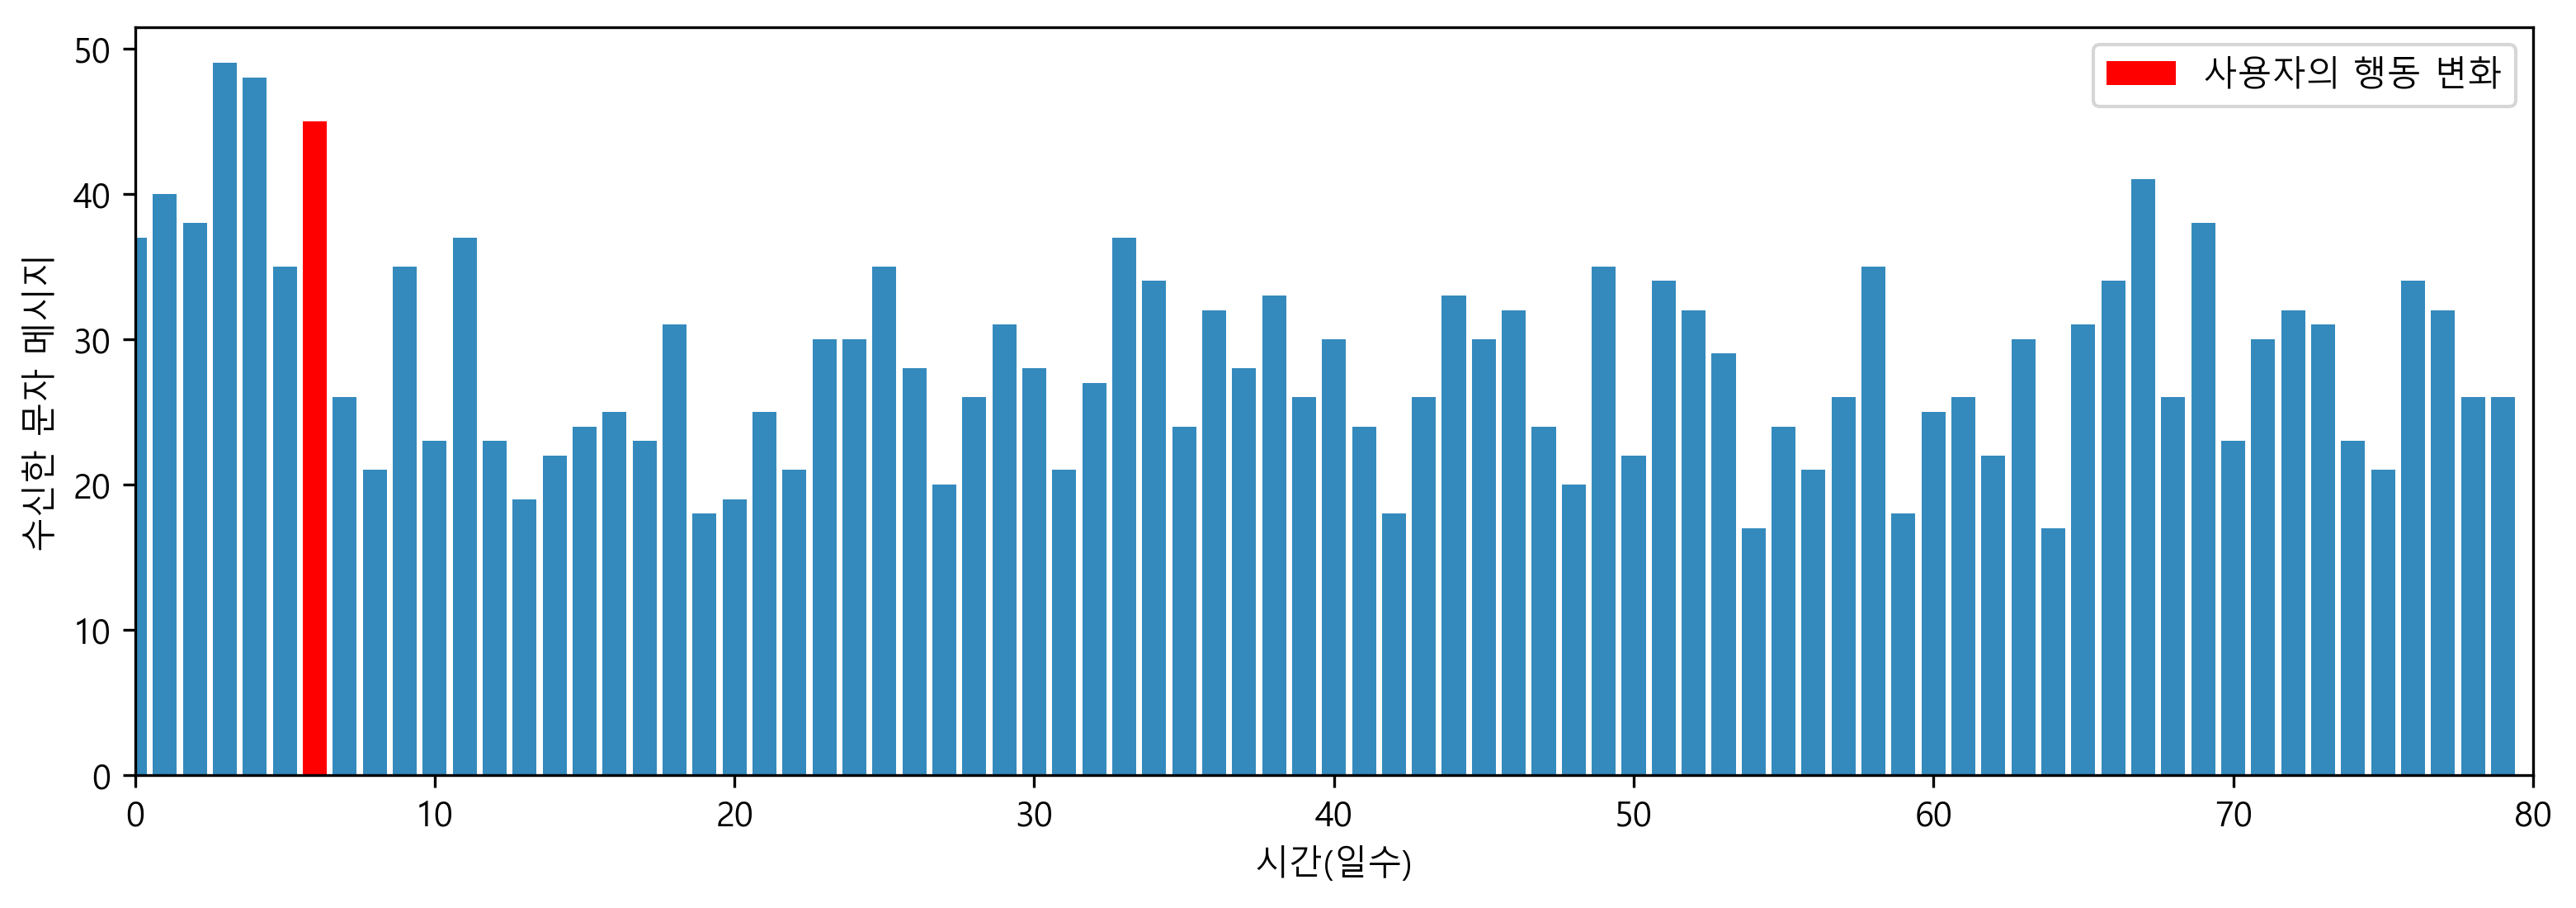

In [15]:
plt.bar(np.arange(80), data, color="#348ABD")
plt.bar(tau - 1, data[tau - 1], color="r", label="사용자의 행동 변화")
plt.xlabel("시간(일수)")
plt.ylabel("수신한 문자 메시지")
#plt.title("모델 시뮬레이션을 위한 인위적인 데이터셋")
plt.xlim(0, 80)
plt.legend();

코드 2-16

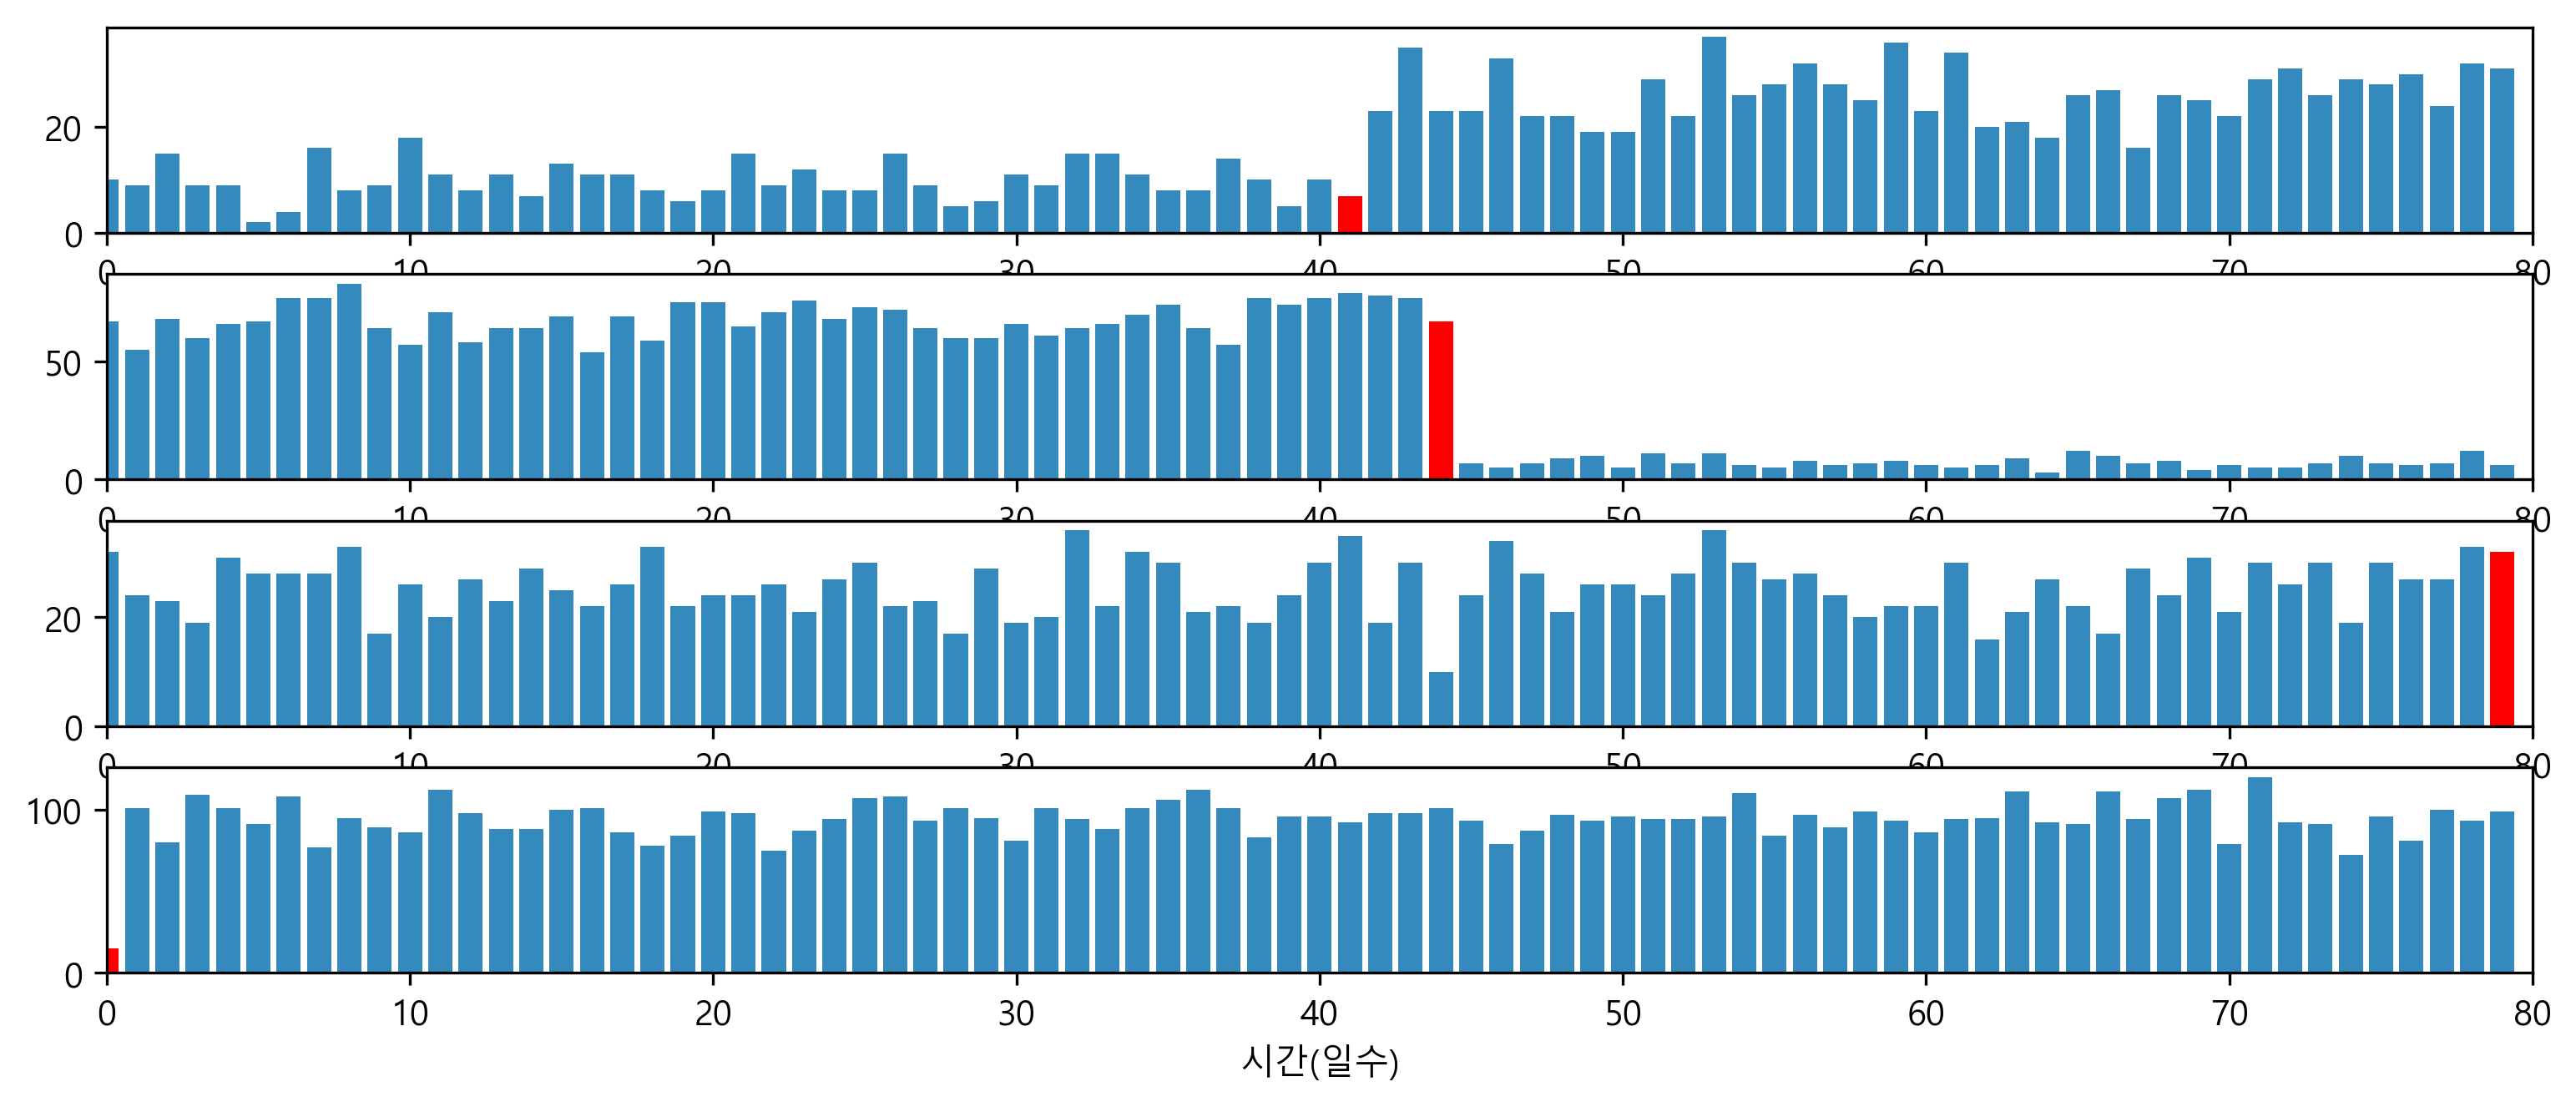

In [16]:
def plot_artificial_sms_dataset():
    tau = pm.rdiscrete_uniform(0, 80)
    alpha = 1./20.
    lambda_1, lambda_2 = pm.rexponential(alpha, 2)
    data = np.r_[pm.rpoisson(lambda_1, tau), pm.rpoisson(lambda_2,80 - tau)]
    plt.bar(np.arange(80), data, color="#348ABD")
    plt.bar(tau - 1, data[tau-1], color="r",
    label="사용자의 행동 변화")
    plt.xlim(0, 80)
    plt.xlabel("시간(일수)")
    #plt.ylabel("수신한 문자 메시지")
figsize(12.5, 5)
plt.title("우리의 모델을 시뮬레이션하여 얻은 가상 데이터셋 추가예제")

for i in range(4):
    plt.subplot(4, 1, i+1)
    plt.xlabel("시간(일수)")
    #plt.ylabel("수신한 문자 메시지")
    plot_artificial_sms_dataset()
    


In [17]:
import pymc as pm

# The parameters are the bounds of the Uniform.
# 모수는 Uniform범위내이다
p = pm.Uniform('p', lower=0, upper=1)

In [18]:
# set constants
# 상수 설정
p_true = 0.05  # 미지수이다 remember, this is unknown.
N = 1500

# sample N Bernoulli random variables from Ber(0.05).
# each random variable has a 0.05 chance of being a 1.
# this is the data-generation step
# Ber(0.05)으로부터 N 개의 Bernoulli 랜덤변수를 표본추출한다
# 각 랜덤변수는 1일 확률이 0.05 이다
# 이건 데이터생성 단계이다.
occurrences = pm.rbernoulli(p_true, N)

print(occurrences)  # 파이썬에서 True == 1 이고 False == 0 이다
print(occurrences.sum())

[False False False ..., False False False]
71


In [19]:
# Occurrences.mean is equal to n/N.
# Occurrences.mean은 n/N이다.
print("A 사이트에서 관측된 빈도는 얼마인가? %.4f" % occurrences.mean())
print("실제 빈도와 같은가? %s" % (occurrences.mean() == p_true))

A 사이트에서 관측된 빈도는 얼마인가? 0.0473
실제 빈도와 같은가? False


In [20]:
# include the observations, which are Bernoulli
# Bernoulli 관측치를 포함한다
obs = pm.Bernoulli("obs", p, value=occurrences, observed=True)

# To be explained in chapter 3
# 3장에서 설명할 것이다
mcmc = pm.MCMC([p, obs])
mcmc.sample(20000, 1000)

 [-----------------100%-----------------] 20000 of 20000 complete in 1.1 sec

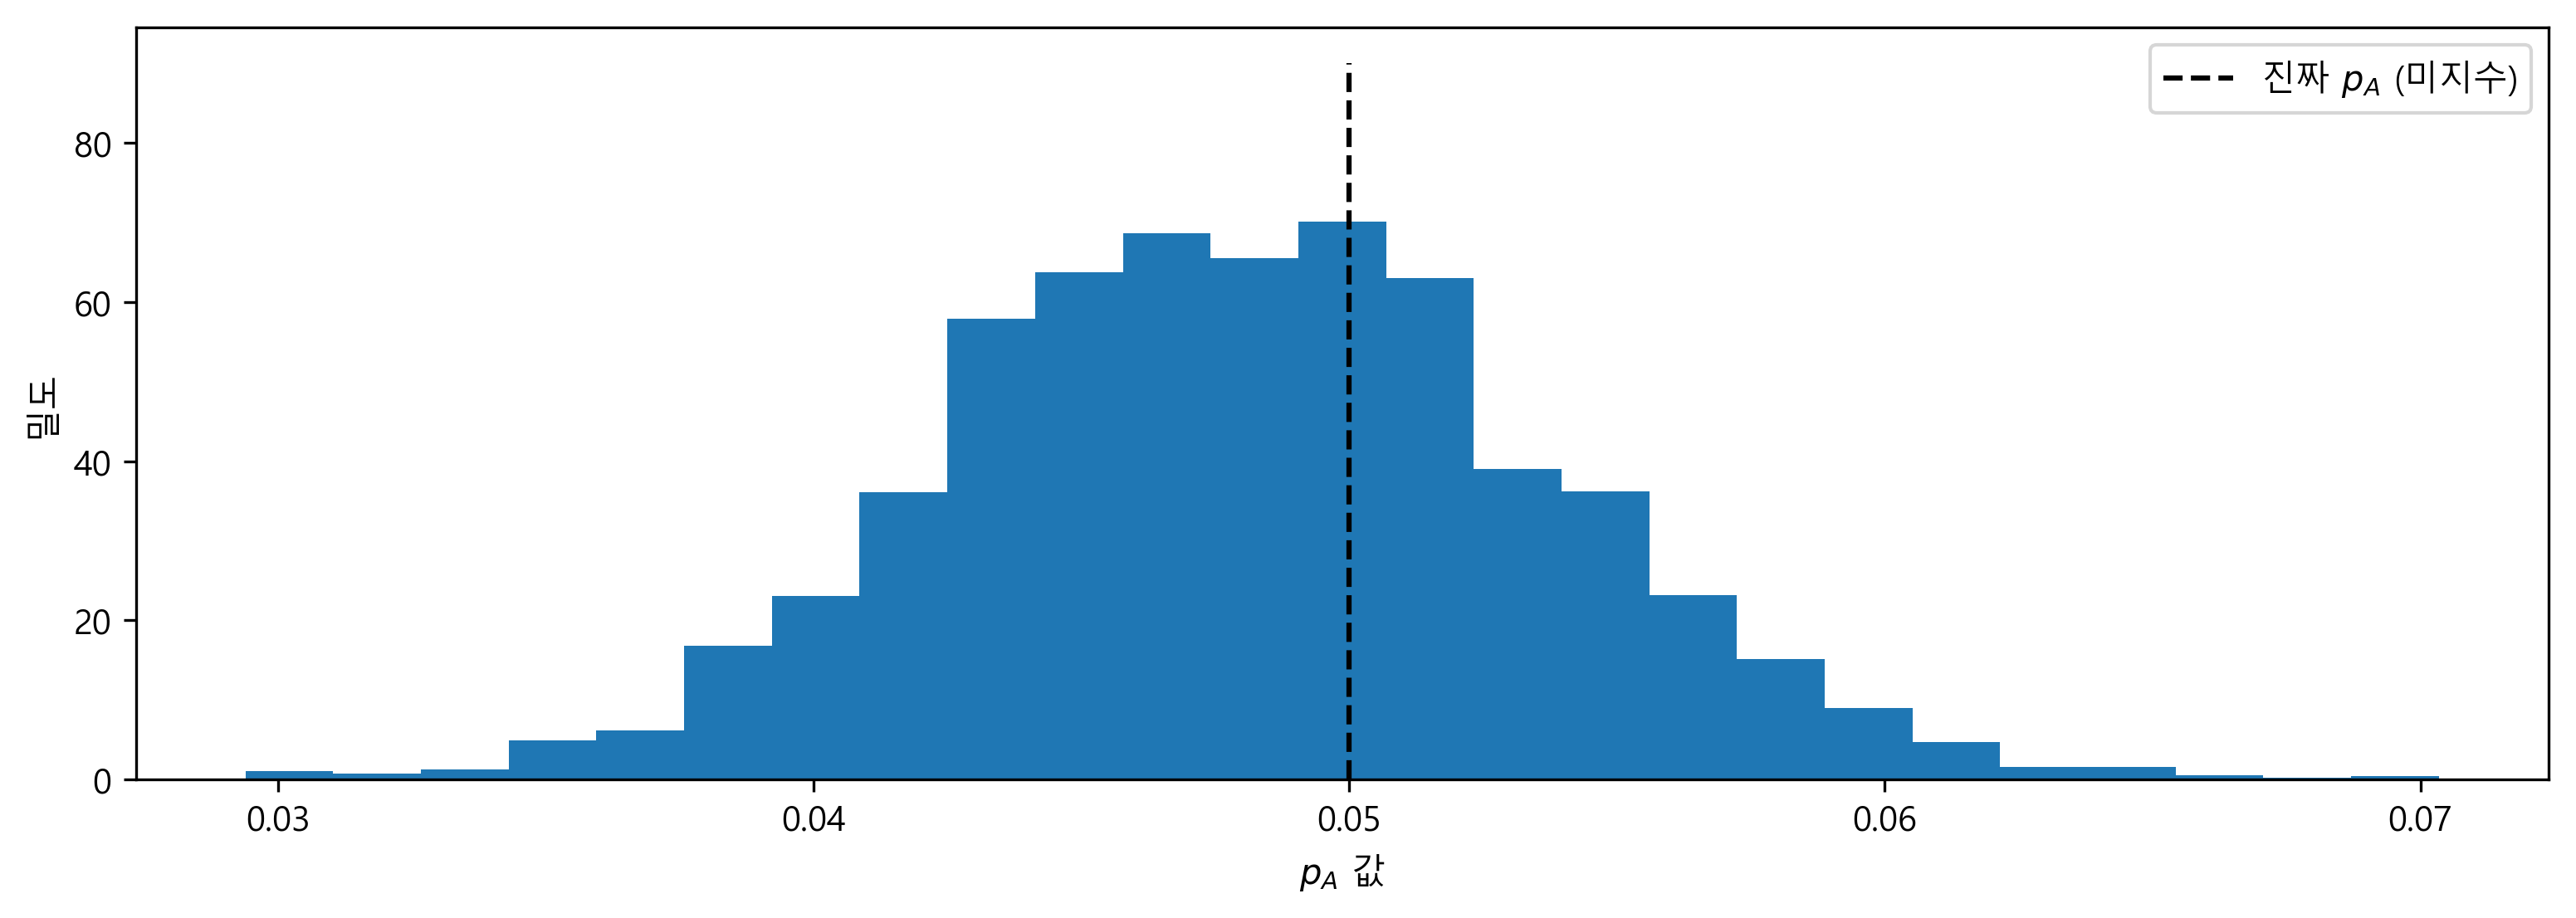

In [21]:
figsize(12.5, 4)
#plt.title("$p_A$의 사후확률분포, 사이트 A의 진짜 효율성")
plt.vlines(p_true, 0, 90, linestyle="--", label="진짜 $p_A$ (미지수)")
plt.hist(mcmc.trace("p")[:], bins=25, histtype="stepfilled", normed=True)
plt.xlabel("$p_A$ 값")
plt.ylabel("밀도")
plt.legend();

In [22]:
import pymc as pm
figsize(12, 4)

# these two quantities are unknown to us.
# 아래의 둘은 미지수이다
true_p_A = 0.05
true_p_B = 0.04

# notice the unequal sample sizes -- no problem in Bayesian analysis.
# 표본의 크기가 다르지만 베이지안분석에서는 문제가 되진 않는다
N_A = 1500
N_B = 750

# generate some observations
# 관측치를 생성한다
observations_A = pm.rbernoulli(true_p_A, N_A)
observations_B = pm.rbernoulli(true_p_B, N_B)
print("Obs from Site A: ", observations_A[:30].astype(int), "...")
print("Obs from Site B: ", observations_B[:30].astype(int), "...")

Obs from Site A:  [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] ...
Obs from Site B:  [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0] ...


In [23]:
print(observations_A.mean())
print(observations_B.mean())

0.052
0.0306666666667


In [24]:
# Set up the pymc model. Again assume Uniform priors for p_A and p_B.
# pymc모델 설정. p_A 와 p_B는 Uniform 사전확률로 가정한다
p_A = pm.Uniform("p_A", 0, 1)
p_B = pm.Uniform("p_B", 0, 1)


# Define the deterministic delta function. This is our unknown of interest.
# deterministic delta 함수 정의. 이것은 미지수이며 관심사항이다
@pm.deterministic
def delta(p_A=p_A, p_B=p_B):
    return p_A - p_B

# Set of observations, in this case we have two observation datasets.
# 관측치 설정. 이 경우 두 개의 관측치 데이터셋이 있다
obs_A = pm.Bernoulli("obs_A", p_A, value=observations_A, observed=True)
obs_B = pm.Bernoulli("obs_B", p_B, value=observations_B, observed=True)

# To be explained in chapter 3.
# 3장에서 설명예정
mcmc = pm.MCMC([p_A, p_B, delta, obs_A, obs_B])
mcmc.sample(25000, 5000)

 [-----------------100%-----------------] 25000 of 25000 complete in 2.3 sec

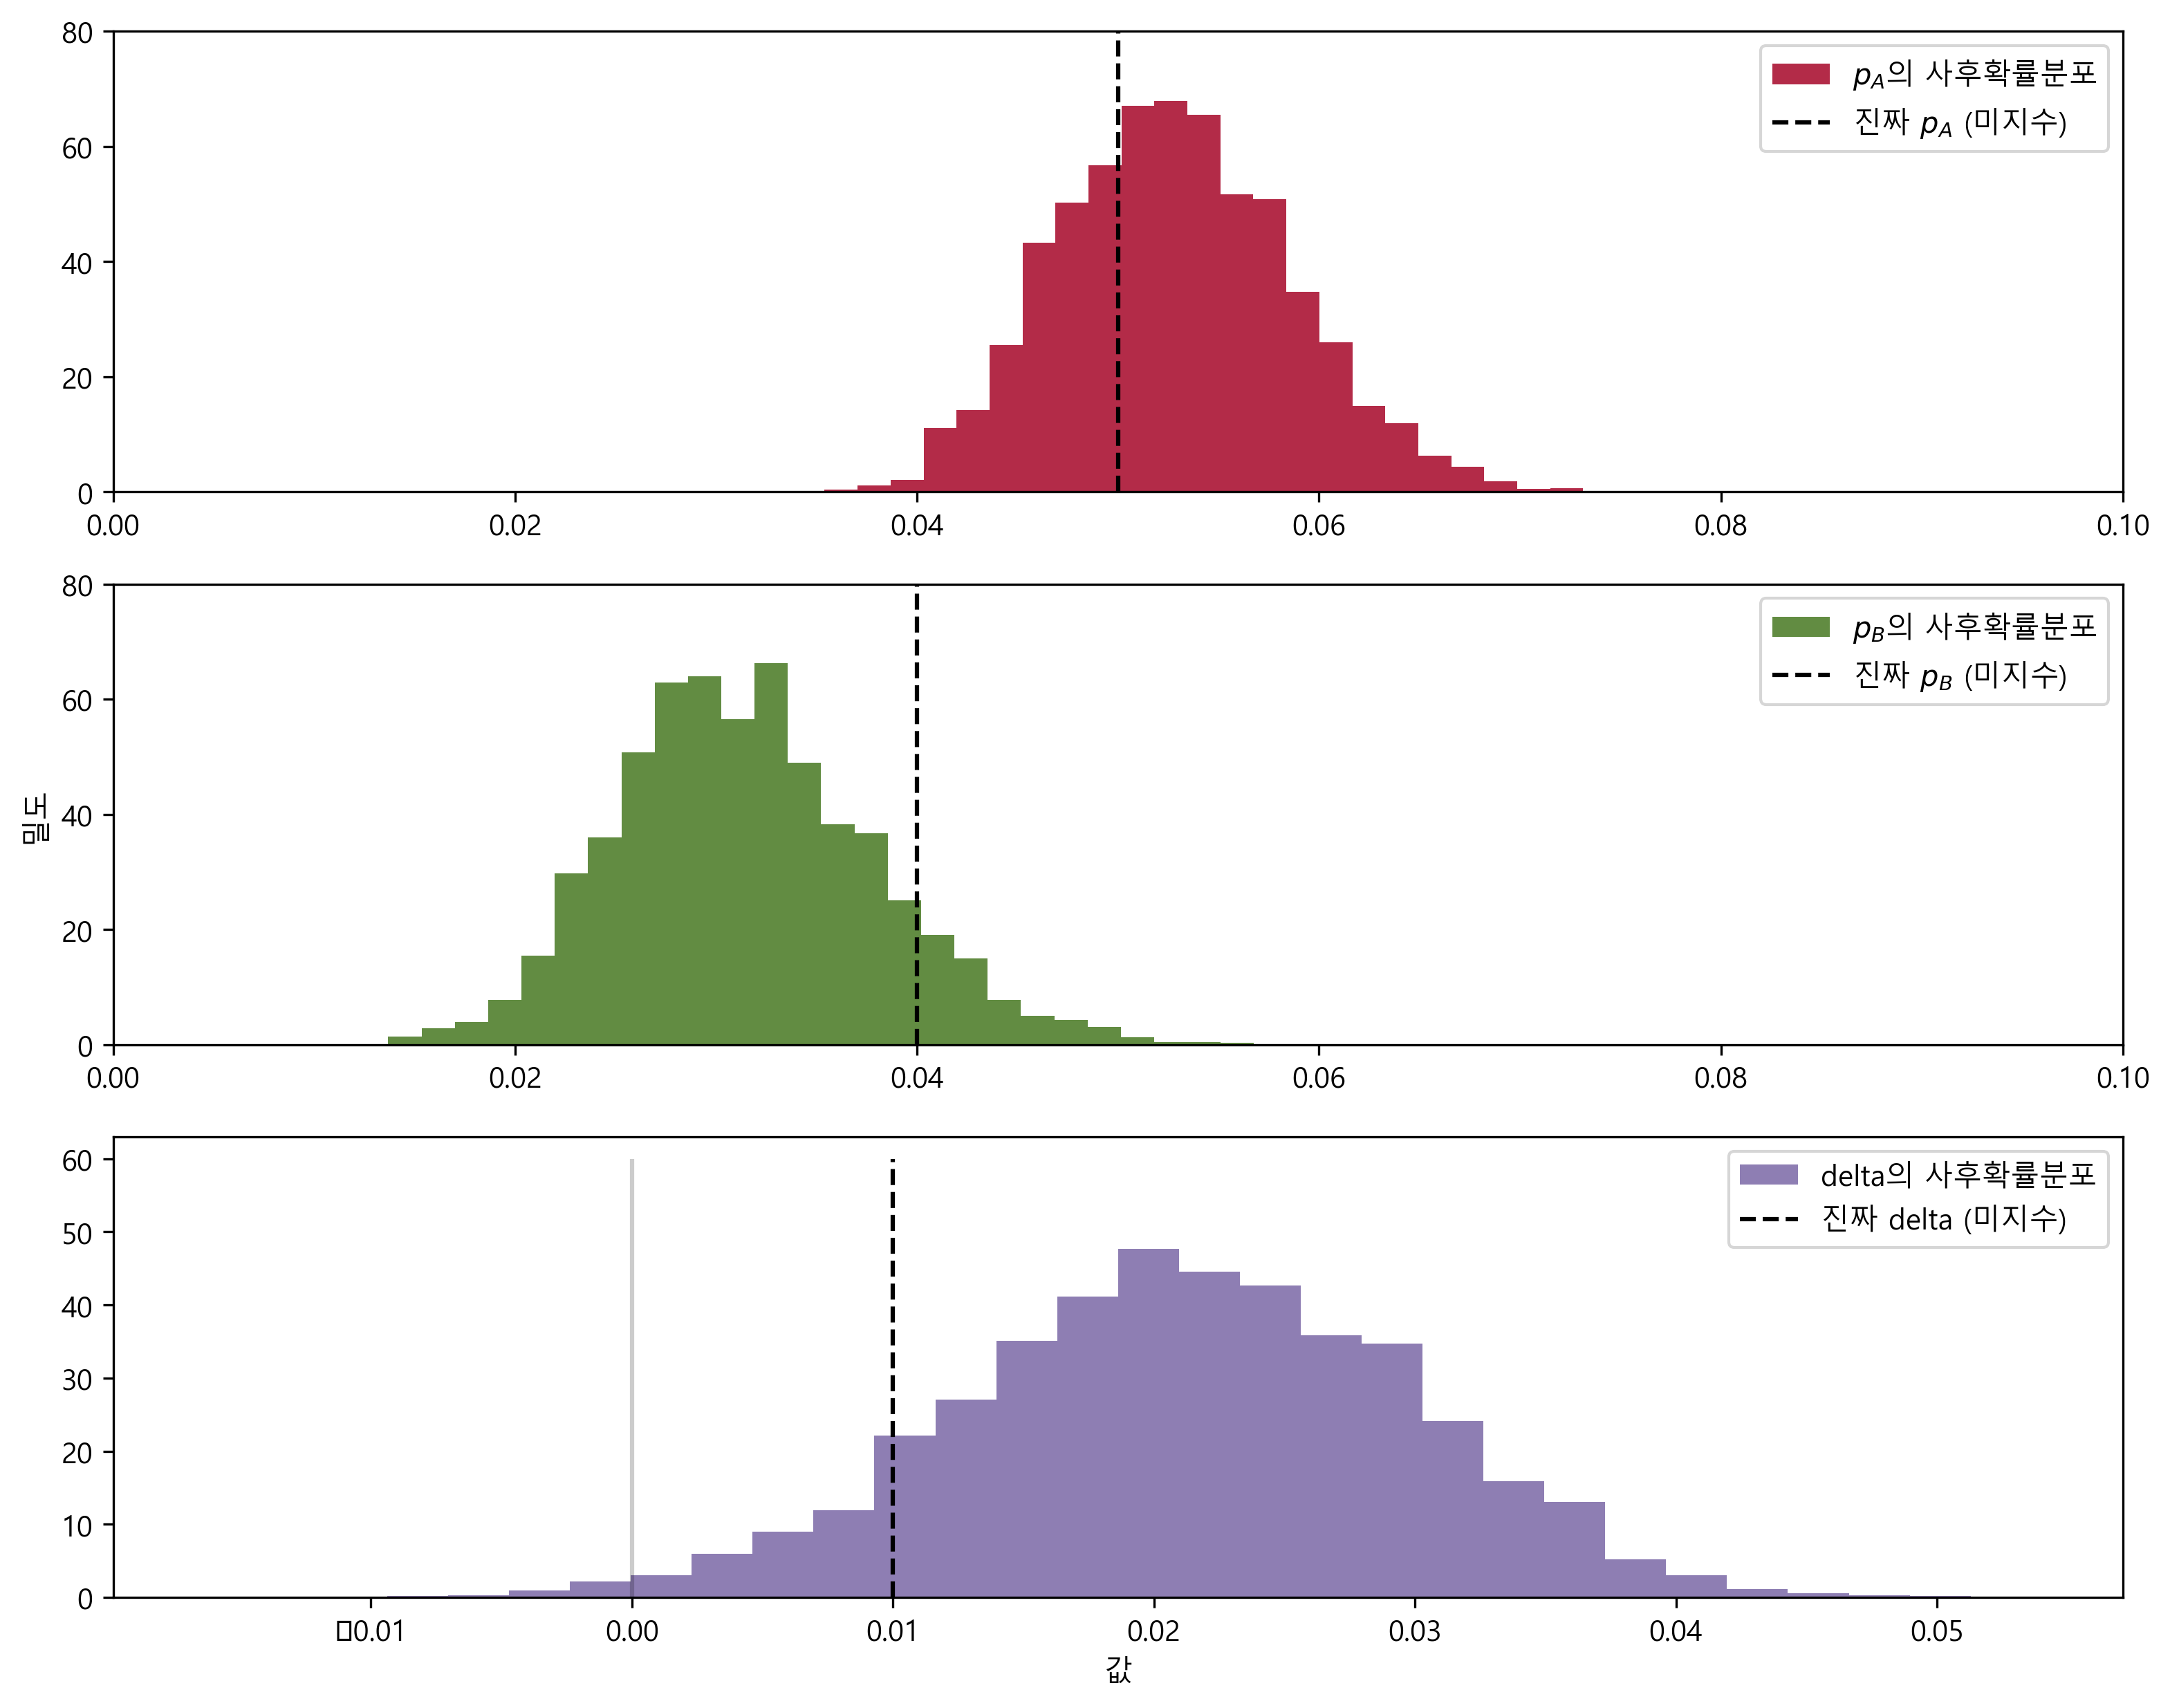

In [25]:
p_A_samples = mcmc.trace("p_A")[:]
p_B_samples = mcmc.trace("p_B")[:]
delta_samples = mcmc.trace("delta")[:]

figsize(12.5, 10)

# histogram of posteriors
# 사후확률의 히스토그램 
ax = plt.subplot(311)

plt.xlim(0, .1)
plt.hist(p_A_samples, histtype='stepfilled', bins=30, alpha=0.85,
         label="$p_A$의 사후확률분포", color="#A60628", normed=True)
plt.vlines(true_p_A, 0, 80, linestyle="--", label="진짜 $p_A$ (미지수)")
plt.legend(loc="upper right")
#plt.title("미지의 $p_A$, $p_B$, delta의 사후확률분포")
plt.ylim(0,80)
ax = plt.subplot(312)

plt.xlim(0, .1)
plt.hist(p_B_samples, histtype='stepfilled', bins=30, alpha=0.85,
         label="$p_B$의 사후확률분포", color="#467821", normed=True)
plt.vlines(true_p_B, 0, 80, linestyle="--", label="진짜 $p_B$ (미지수)")
plt.ylabel("밀도")
plt.legend(loc="upper right")
plt.ylim(0,80)

ax = plt.subplot(313)
plt.hist(delta_samples, histtype='stepfilled', bins=30, alpha=0.85,
         label="delta의 사후확률분포", color="#7A68A6", normed=True)
plt.vlines(true_p_A - true_p_B, 0, 60, linestyle="--",
           label="진짜 delta (미지수)")
plt.vlines(0, 0, 60, color="black", alpha=0.2)
plt.xlabel("값")

plt.legend(loc="upper right");

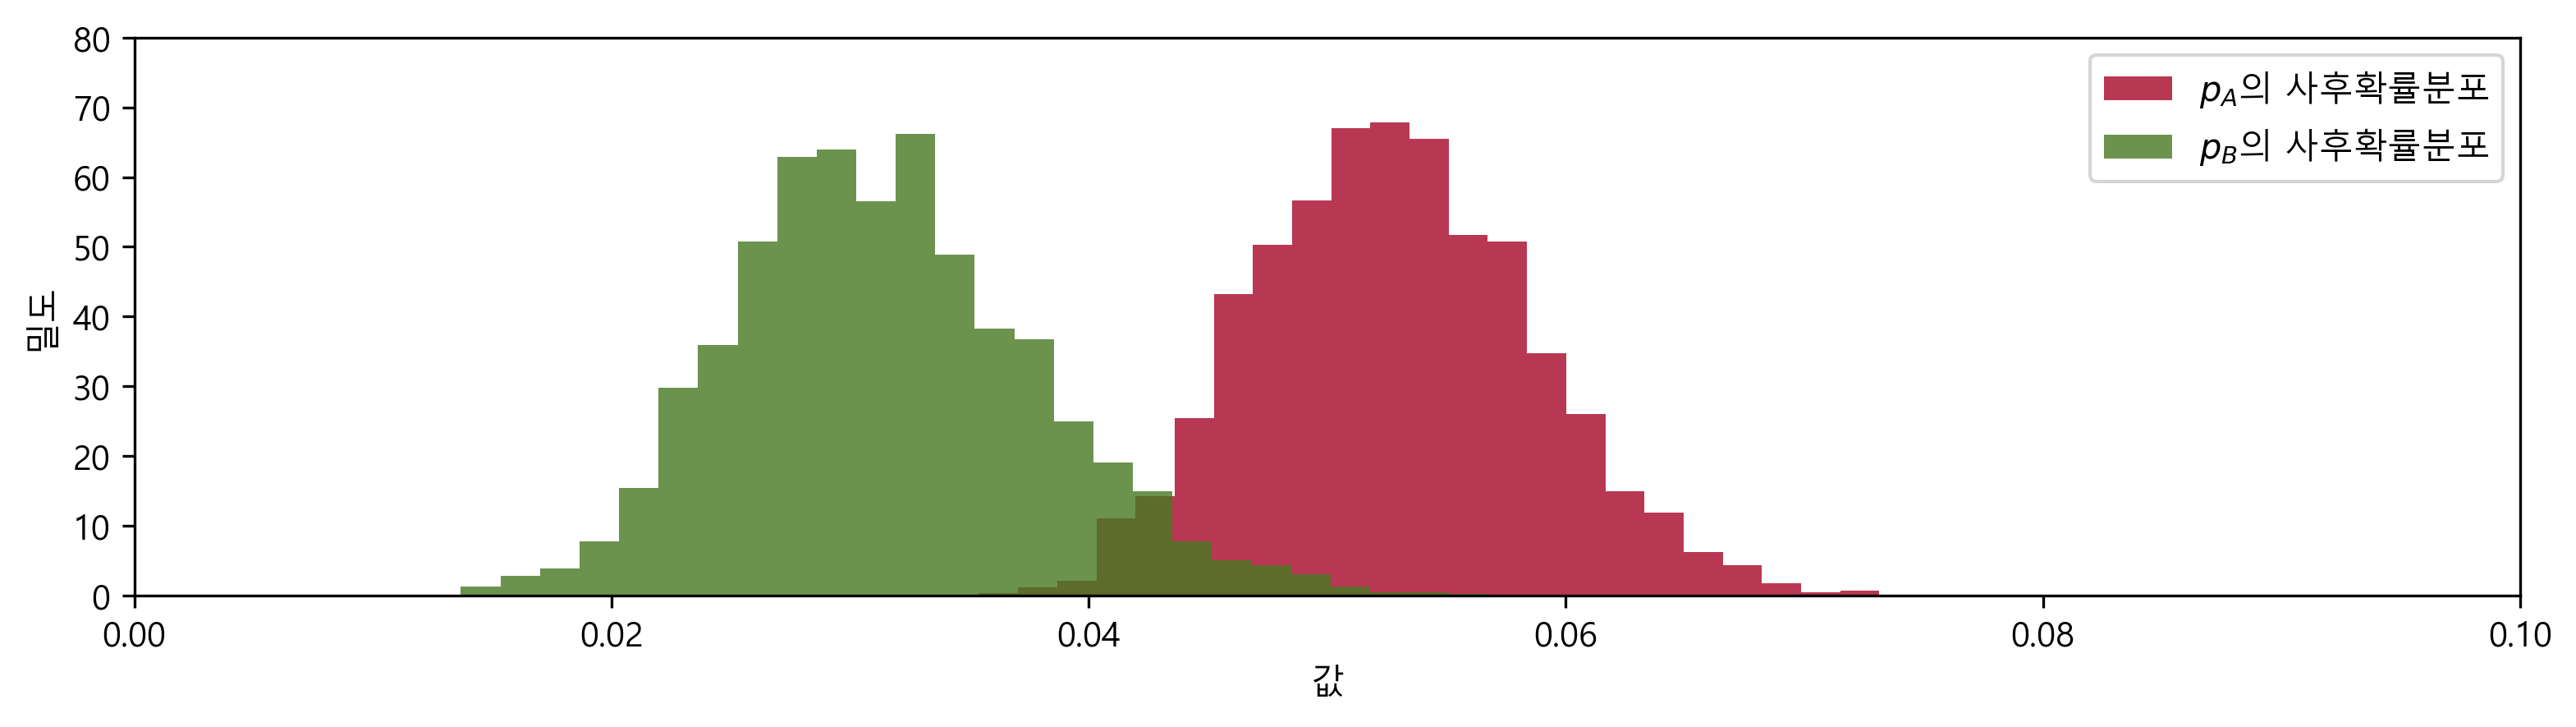

In [26]:
figsize(12.5, 3)
# histogram of posteriors
# 사후확률분포의 히스토그램
plt.xlim(0, .1)
plt.hist(p_A_samples, histtype='stepfilled', bins=30, alpha=0.80,
label="$p_A$의 사후확률분포", color="#A60628", normed=True)
plt.hist(p_B_samples, histtype='stepfilled', bins=30, alpha=0.80,
label="$p_B$의 사후확률분포", color="#467821", normed=True)
plt.legend(loc="upper right")
plt.xlabel("값")
plt.ylabel("밀도")
#plt.title("$p_A$ 와 $p_B$의 사후확률분포")
plt.ylim(0,80);

In [27]:
# Count the number of samples less than 0, i.e. the area under the curve
# before 0, represent the probability that site A is worse than site B.
# 0이하 표본의 갯수를 센다 즉 커브아래의 영역
# 0이전에서 사이트A가 사이트B보다 나쁠 확률을 의미한다
print("A 사이트가 B 사이트보다 나쁠 확률: %.3f" % (delta_samples < 0).mean())
print("A 사이트가 B 사이트보다 나을 확률: %.3f" % (delta_samples > 0).mean())

A 사이트가 B 사이트보다 나쁠 확률: 0.009
A 사이트가 B 사이트보다 나을 확률: 0.991


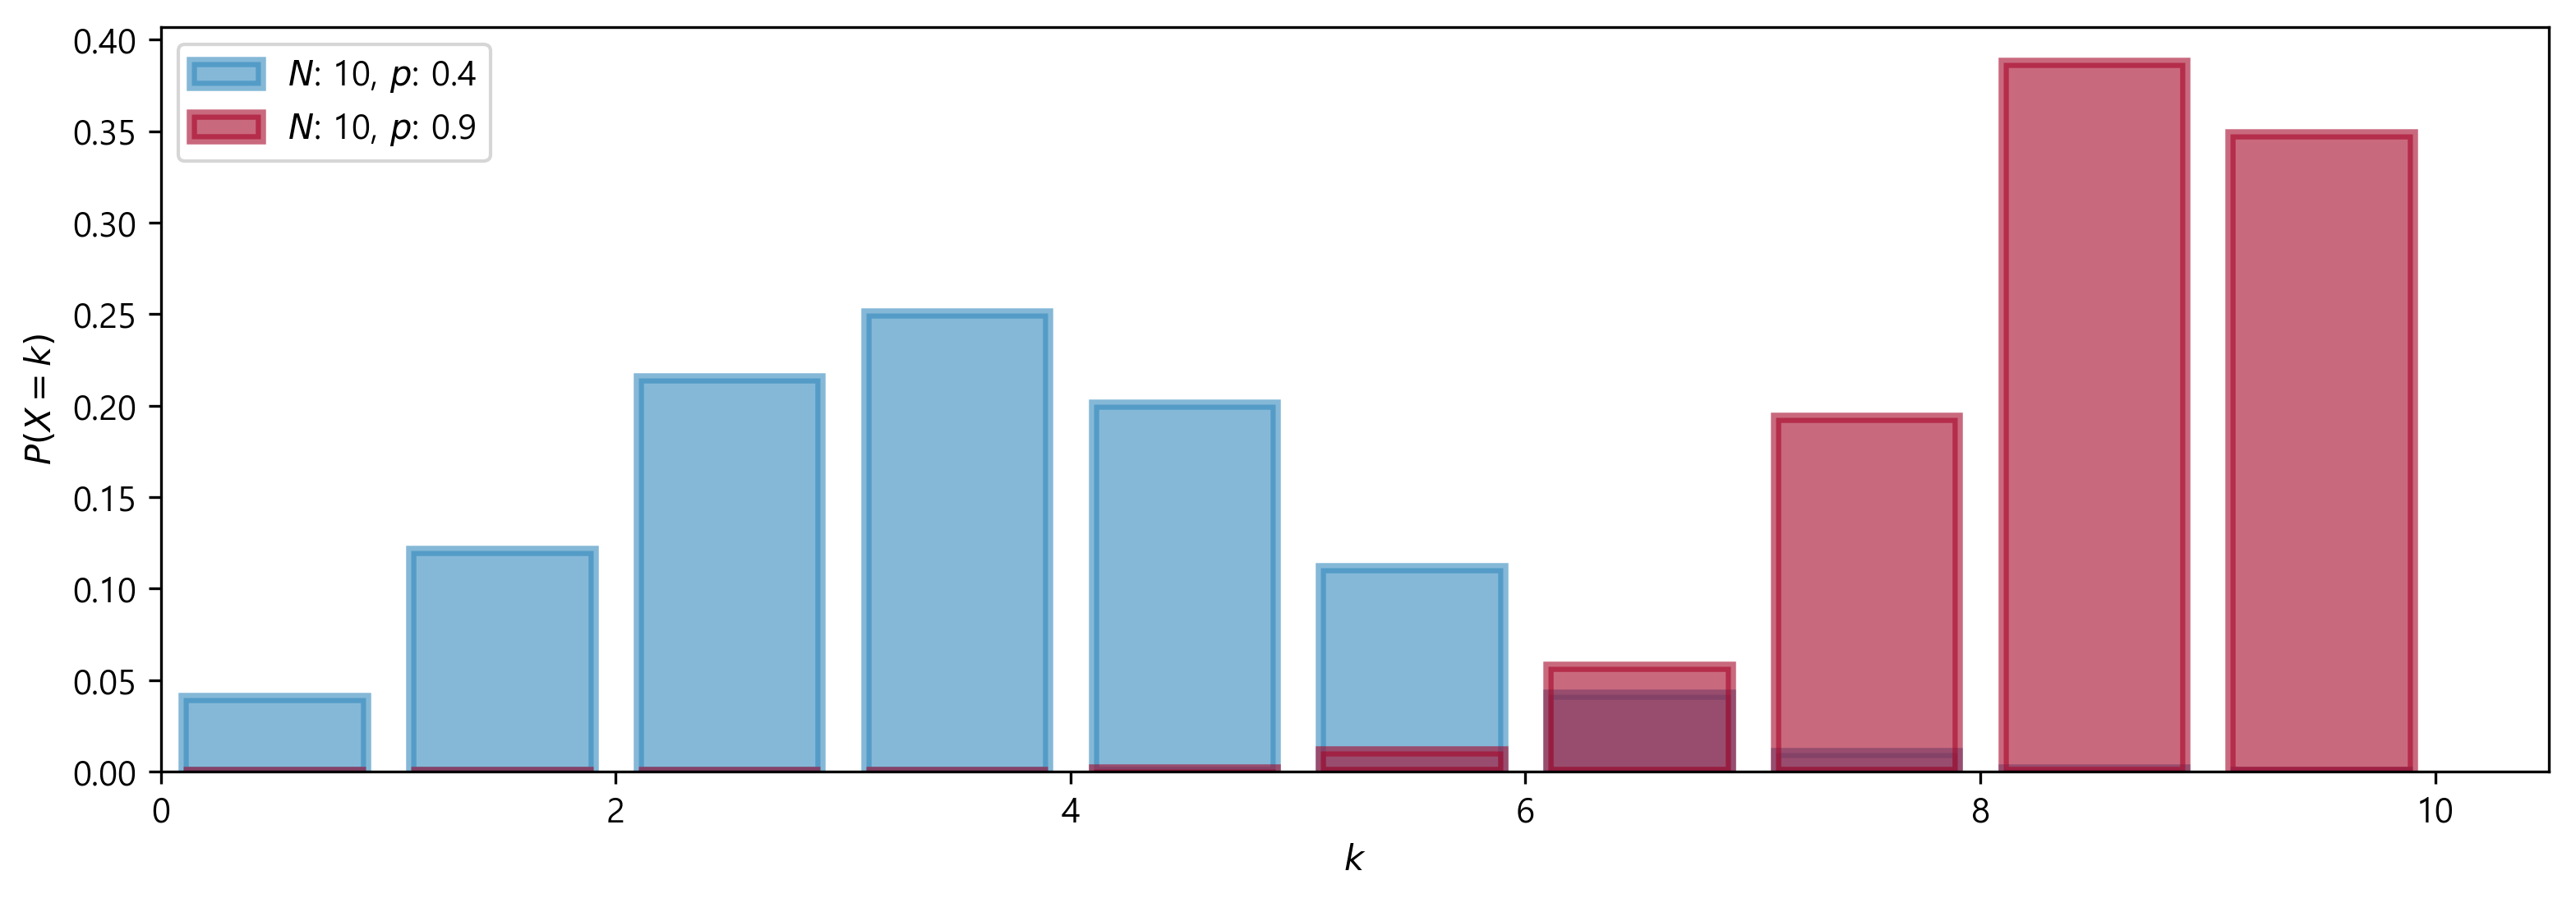

In [28]:
figsize(12.5, 4)

import scipy.stats as stats
binomial = stats.binom

parameters = [(10, .4), (10, .9)]
colors = ["#348ABD", "#A60628"]

for i in range(2):
    N, p = parameters[i]
    _x = np.arange(N + 1)
    plt.bar(_x - 0.5, binomial.pmf(_x, N, p), color=colors[i],edgecolor=colors[i],alpha=0.6,label="$N$: %d, $p$: %.1f" % (N, p),
            linewidth=3)

plt.legend(loc="upper left")
plt.xlim(0, 10.5)
plt.xlabel("$k$")
plt.ylabel("$P(X = k)$")
#plt.title("이항랜덤변수의 확률질량분포");

In [29]:
import pymc as pm

N = 100
p = pm.Uniform("freq_cheating", 0, 1)

In [30]:
true_answers = pm.Bernoulli("truths", p, size=N)

In [31]:
first_coin_flips = pm.Bernoulli("first_flips", 0.5, size=N)
print(first_coin_flips.value)

[ True  True False False  True False  True False  True False  True False
  True False False False False  True False False  True  True False  True
 False False False  True  True False False False  True  True  True False
  True  True False  True  True False  True False False  True  True  True
 False False  True False False False  True  True False False  True False
  True False False  True False False False False False False False False
  True  True  True False  True  True False  True  True  True  True False
 False  True False False False False False  True False  True False  True
 False  True  True False]


In [32]:
second_coin_flips = pm.Bernoulli("second_flips", 0.5, size=N)

In [33]:
@pm.deterministic
def observed_proportion(t_a=true_answers,
                        fc=first_coin_flips,
                        sc=second_coin_flips):

    observed = fc * t_a + (1 - fc) * sc
    return observed.sum() / float(N)

In [34]:
observed_proportion.value

0.31

In [35]:
X = 35

observations = pm.Binomial("obs", N, observed_proportion, observed=True,
                           value=X)

In [36]:
model = pm.Model([p, true_answers, first_coin_flips,
                  second_coin_flips, observed_proportion, observations])

# To be explained in Chapter 3!
# 3장에서 설명예정
mcmc = pm.MCMC(model)
mcmc.sample(40000, 15000)

 [-----------------100%-----------------] 40000 of 40000 complete in 10.5 sec

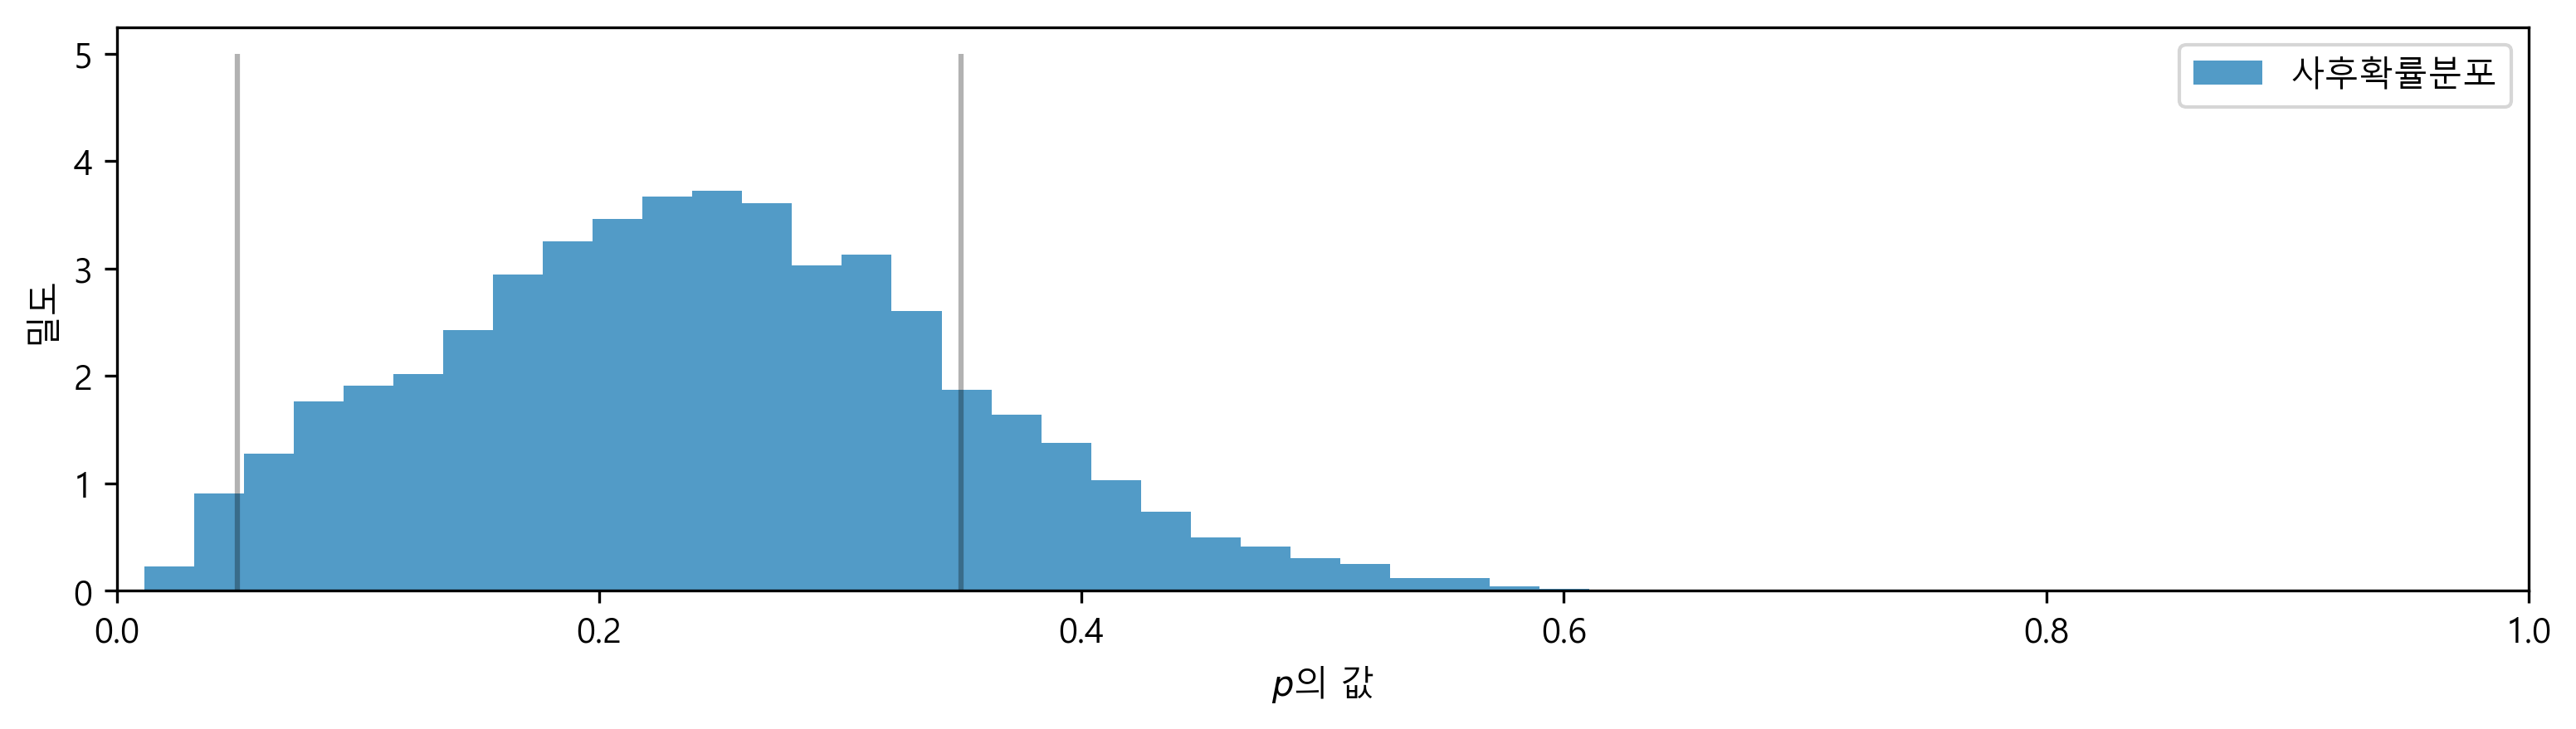

In [37]:
figsize(12.5, 3)
p_trace = mcmc.trace("freq_cheating")[:]
plt.hist(p_trace, histtype="stepfilled", normed=True, alpha=0.85, bins=30,
         label="사후확률분포", color="#348ABD")
plt.vlines([.05, .35], [0, 0], [5, 5], alpha=0.3)
plt.xlim(0, 1)
plt.xlabel("$p$의 값")
plt.ylabel("밀도")
#plt.title("모수 $p$의 사후확률분포")
plt.legend();

In [38]:
p = pm.Uniform("freq_cheating", 0, 1)

@pm.deterministic
def p_skewed(p=p):
    return 0.5 * p + 0.25

In [39]:
yes_responses = pm.Binomial("number_cheaters", 100, p_skewed,
                            value=35, observed=True)

In [40]:
model = pm.Model([yes_responses, p_skewed, p])

# To Be Explained in Chapter 3!
# 3장에서 설명예정
mcmc = pm.MCMC(model)
mcmc.sample(25000, 2500)

 [-----------------100%-----------------] 25000 of 25000 complete in 1.1 sec

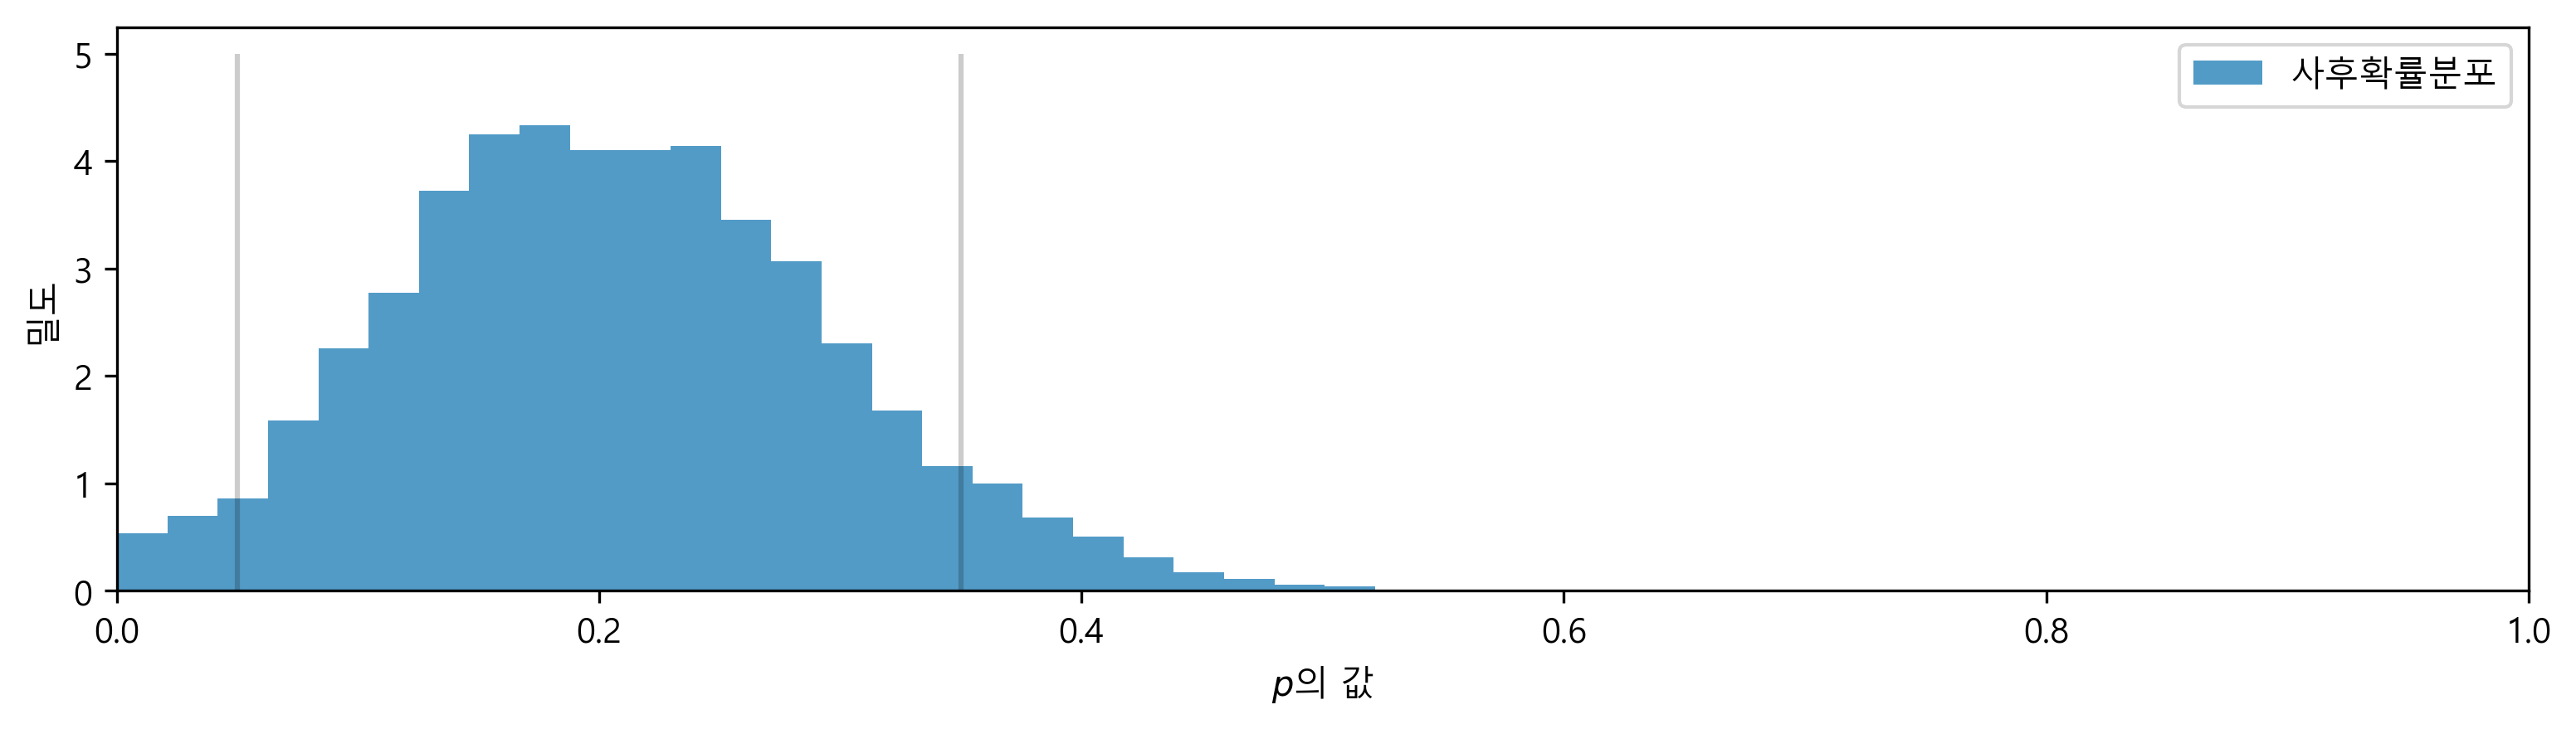

In [41]:
figsize(12.5, 3)
p_trace = mcmc.trace("freq_cheating")[:]
plt.hist(p_trace, histtype="stepfilled", normed=True, alpha=0.85, bins=30,
         label="사후확률분포", color="#348ABD")
plt.vlines([.05, .35], [0, 0], [5, 5], alpha=0.2)
plt.xlim(0, 1)
plt.xlabel("$p$의 값")
plt.ylabel("밀도")
#plt.title("대안모델에서 구한 모수 $p$의 사후확률분포")
plt.legend();

In [42]:
N = 10
x = np.empty(N, dtype=object)
for i in range(0, N):
    x[i] = pm.Exponential('x_%i' % i, (i + 1) ** 2)

Temp (F), O-Ring failure?
[[ 66.   0.]
 [ 70.   1.]
 [ 69.   0.]
 [ 68.   0.]
 [ 67.   0.]
 [ 72.   0.]
 [ 73.   0.]
 [ 70.   0.]
 [ 57.   1.]
 [ 63.   1.]
 [ 70.   1.]
 [ 78.   0.]
 [ 67.   0.]
 [ 53.   1.]
 [ 67.   0.]
 [ 75.   0.]
 [ 70.   0.]
 [ 81.   0.]
 [ 76.   0.]
 [ 79.   0.]
 [ 75.   1.]
 [ 76.   0.]
 [ 58.   1.]]


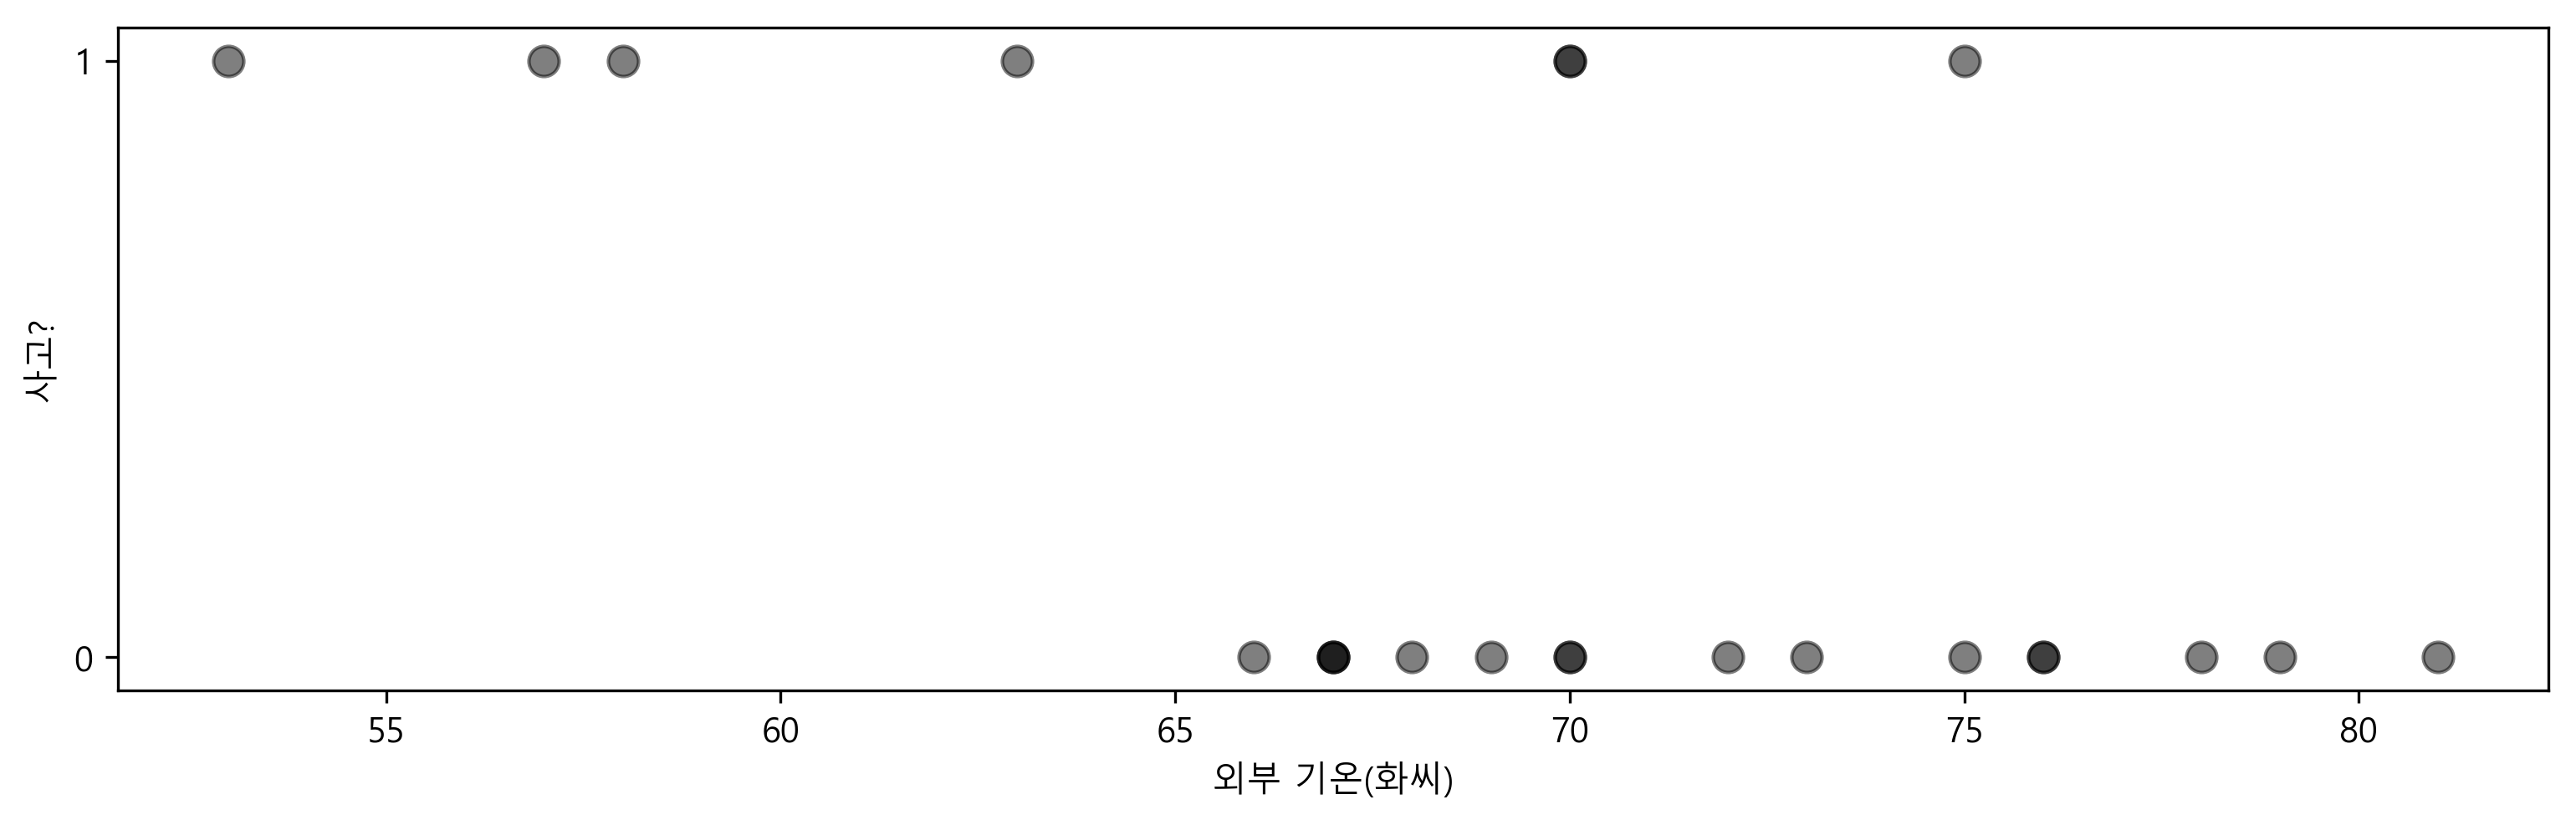

In [43]:
figsize(12.5, 3.5)
np.set_printoptions(precision=3, suppress=True)
challenger_data = np.genfromtxt(r"C:\Users\wh\006775\Probabilistic-Programming-and-Bayesian-Methods-for-Hackers-master\Chapter2_MorePyMC\data\challenger_data.csv", skip_header=1,
                                usecols=[1, 2], missing_values="NA",
                                delimiter=",")
# drop the NA values
# NA값은 버린다
challenger_data = challenger_data[~np.isnan(challenger_data[:, 1])]

# plot it, as a function of temperature (the first column)
# 기온함수로서 작도한다
print("Temp (F), O-Ring failure?")
print(challenger_data)

plt.scatter(challenger_data[:, 0], challenger_data[:, 1], s=75, color="k",alpha=0.5)
plt.yticks([0, 1])
plt.ylabel("사고?")
plt.xlabel("외부 기온(화씨)")
#plt.title("우주왕복선 O링의 결함 대 기온");

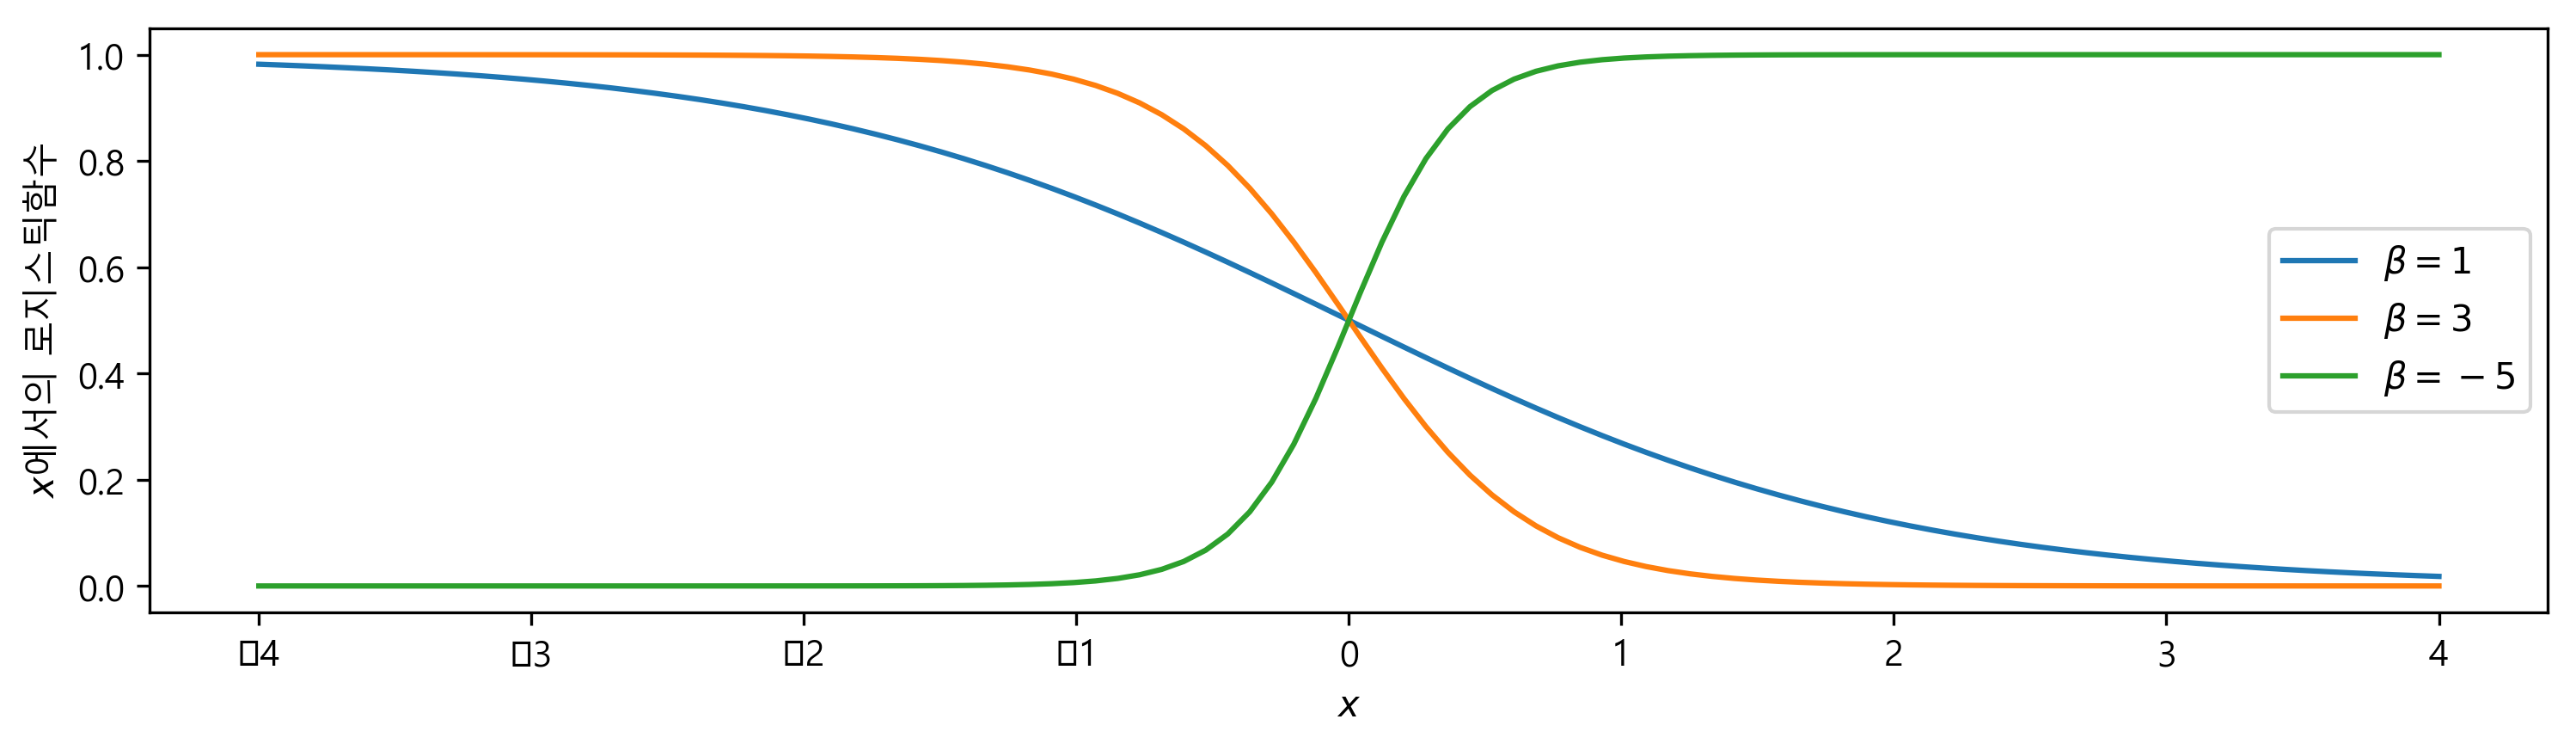

In [44]:
figsize(12, 3)

def logistic(x, beta):
    return 1.0 / (1.0 + np.exp(beta * x))

x = np.linspace(-4, 4, 100)
plt.plot(x, logistic(x, 1), label=r"$\beta = 1$")
plt.plot(x, logistic(x, 3), label=r"$\beta = 3$")
plt.plot(x, logistic(x, -5), label=r"$\beta = -5$")
plt.xlabel("$x$")
plt.ylabel("$x$에서의 로지스틱함수")
#plt.title("여러 $\\beta$ 모수에 대한 로지스틱함수", fontsize=14)
plt.legend();

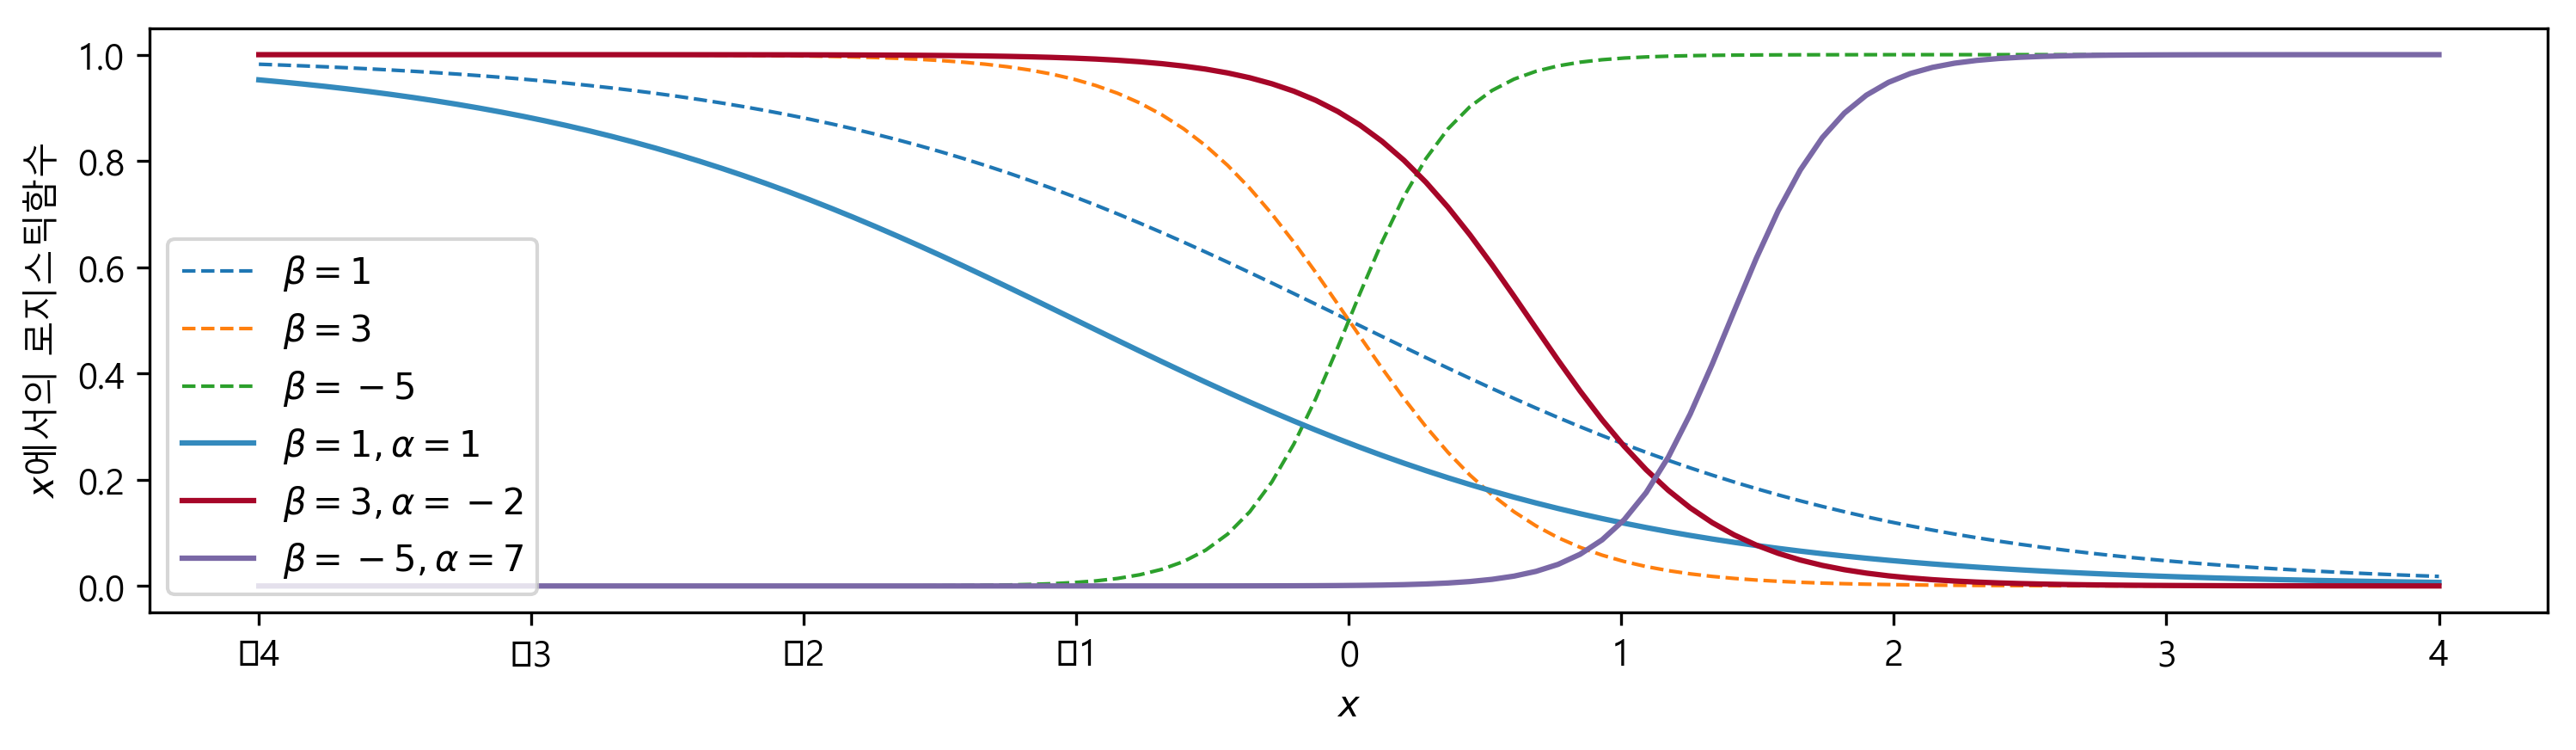

In [45]:
def logistic(x, beta, alpha=0):
    return 1.0 / (1.0 + np.exp(np.dot(beta, x) + alpha))

x = np.linspace(-4, 4, 100)

plt.plot(x, logistic(x, 1), label=r"$\beta = 1$", ls="--", lw=1)
plt.plot(x, logistic(x, 3), label=r"$\beta = 3$", ls="--", lw=1)
plt.plot(x, logistic(x, -5), label=r"$\beta = -5$", ls="--", lw=1)

plt.plot(x, logistic(x, 1, 1), label=r"$\beta = 1, \alpha = 1$",
         color="#348ABD")
plt.plot(x, logistic(x, 3, -2), label=r"$\beta = 3, \alpha = -2$",
         color="#A60628")
plt.plot(x, logistic(x, -5, 7), label=r"$\beta = -5, \alpha = 7$",
         color="#7A68A6")

#plt.title("여러 $\\alpha$ 와 $\\beta$ 값의 로지스틱함수", fontsize=14)
plt.xlabel("$x$")
plt.ylabel("$x$에서의 로지스틱함수")
plt.legend(loc="lower left");

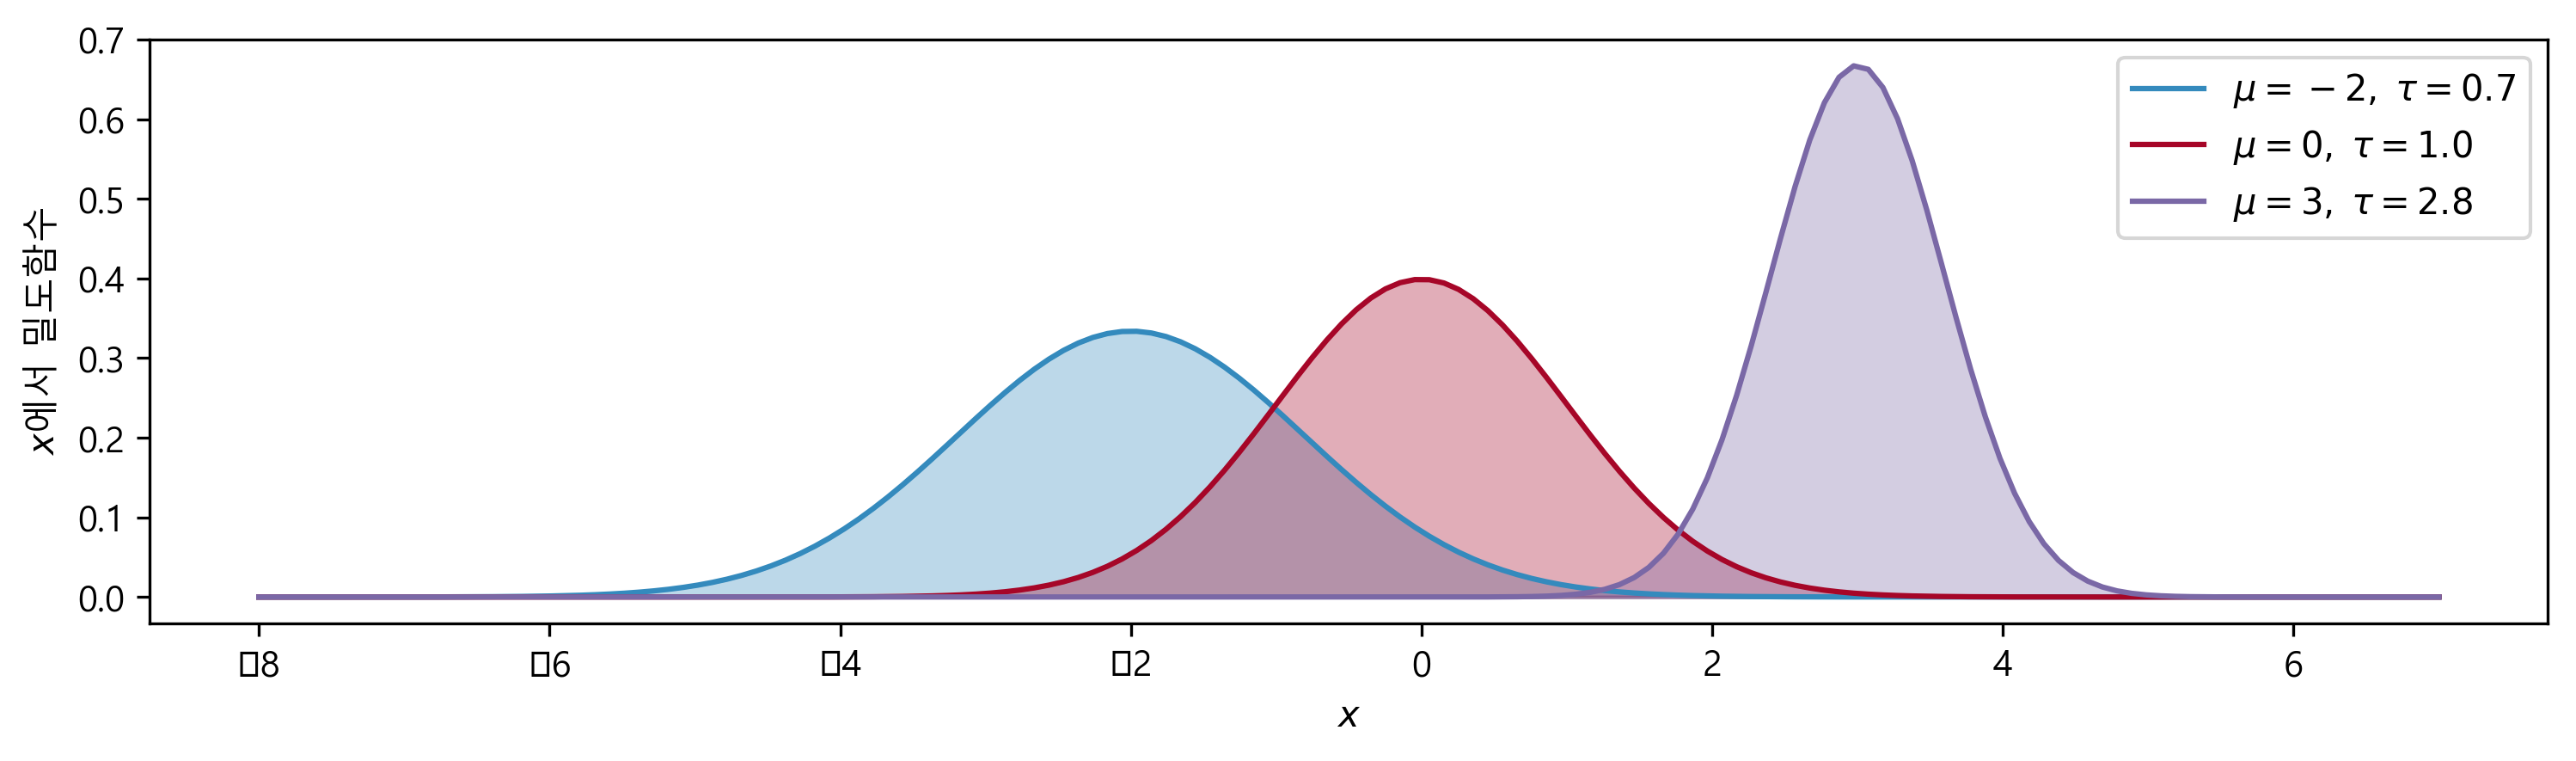

In [46]:
import scipy.stats as stats

nor = stats.norm
x = np.linspace(-8, 7, 150)
mu = (-2, 0, 3)
tau = (.7, 1, 2.8)
colors = ["#348ABD", "#A60628", "#7A68A6"]
parameters = zip(mu, tau, colors)

for _mu, _tau, _color in parameters:
    plt.plot(x, nor.pdf(x, _mu, scale=1. / np.sqrt(_tau)),
             label="$\mu = %d,\;\\tau = %.1f$" % (_mu, _tau), color=_color)
    plt.fill_between(x, nor.pdf(x, _mu, scale=1. / np.sqrt(_tau)), color=_color,
                     alpha=.33)

plt.legend(loc="upper right")
plt.xlabel("$x$")
plt.ylabel("$x$에서 밀도함수")
#plt.title("3개의 정규랜덤변수에 대한 확률분포");

In [47]:
import pymc as pm

temperature = challenger_data[:, 0]
D = challenger_data[:, 1]  # 검출되었는가 아닌가? 

# notice the`value` here. We explain why below.
# 여기서 value를 주목할 필요가 있다. 이유는 아래에서 설명한다
beta = pm.Normal("beta", 0, 0.001, value=0)
alpha = pm.Normal("alpha", 0, 0.001, value=0)


@pm.deterministic
def p(t=temperature, alpha=alpha, beta=beta):
    return 1.0 / (1. + np.exp(beta * t + alpha))

In [48]:
p.value

array([ 0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,
        0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,
        0.5])

In [49]:
# connect the probabilities in `p` with our observations through a
# Bernoulli random variable.
# Bernoulli랜덤변수을 통해 확률과 관측치를 연결한다
observed = pm.Bernoulli("bernoulli_obs", p, value=D, observed=True)

model = pm.Model([observed, beta, alpha])

# Mysterious code to be explained in Chapter 3
# 3장에서 설명예정
map_ = pm.MAP(model)
map_.fit()
mcmc = pm.MCMC(model)
mcmc.sample(120000, 100000, 2)

 [-----------------100%-----------------] 120000 of 120000 complete in 9.1 sec

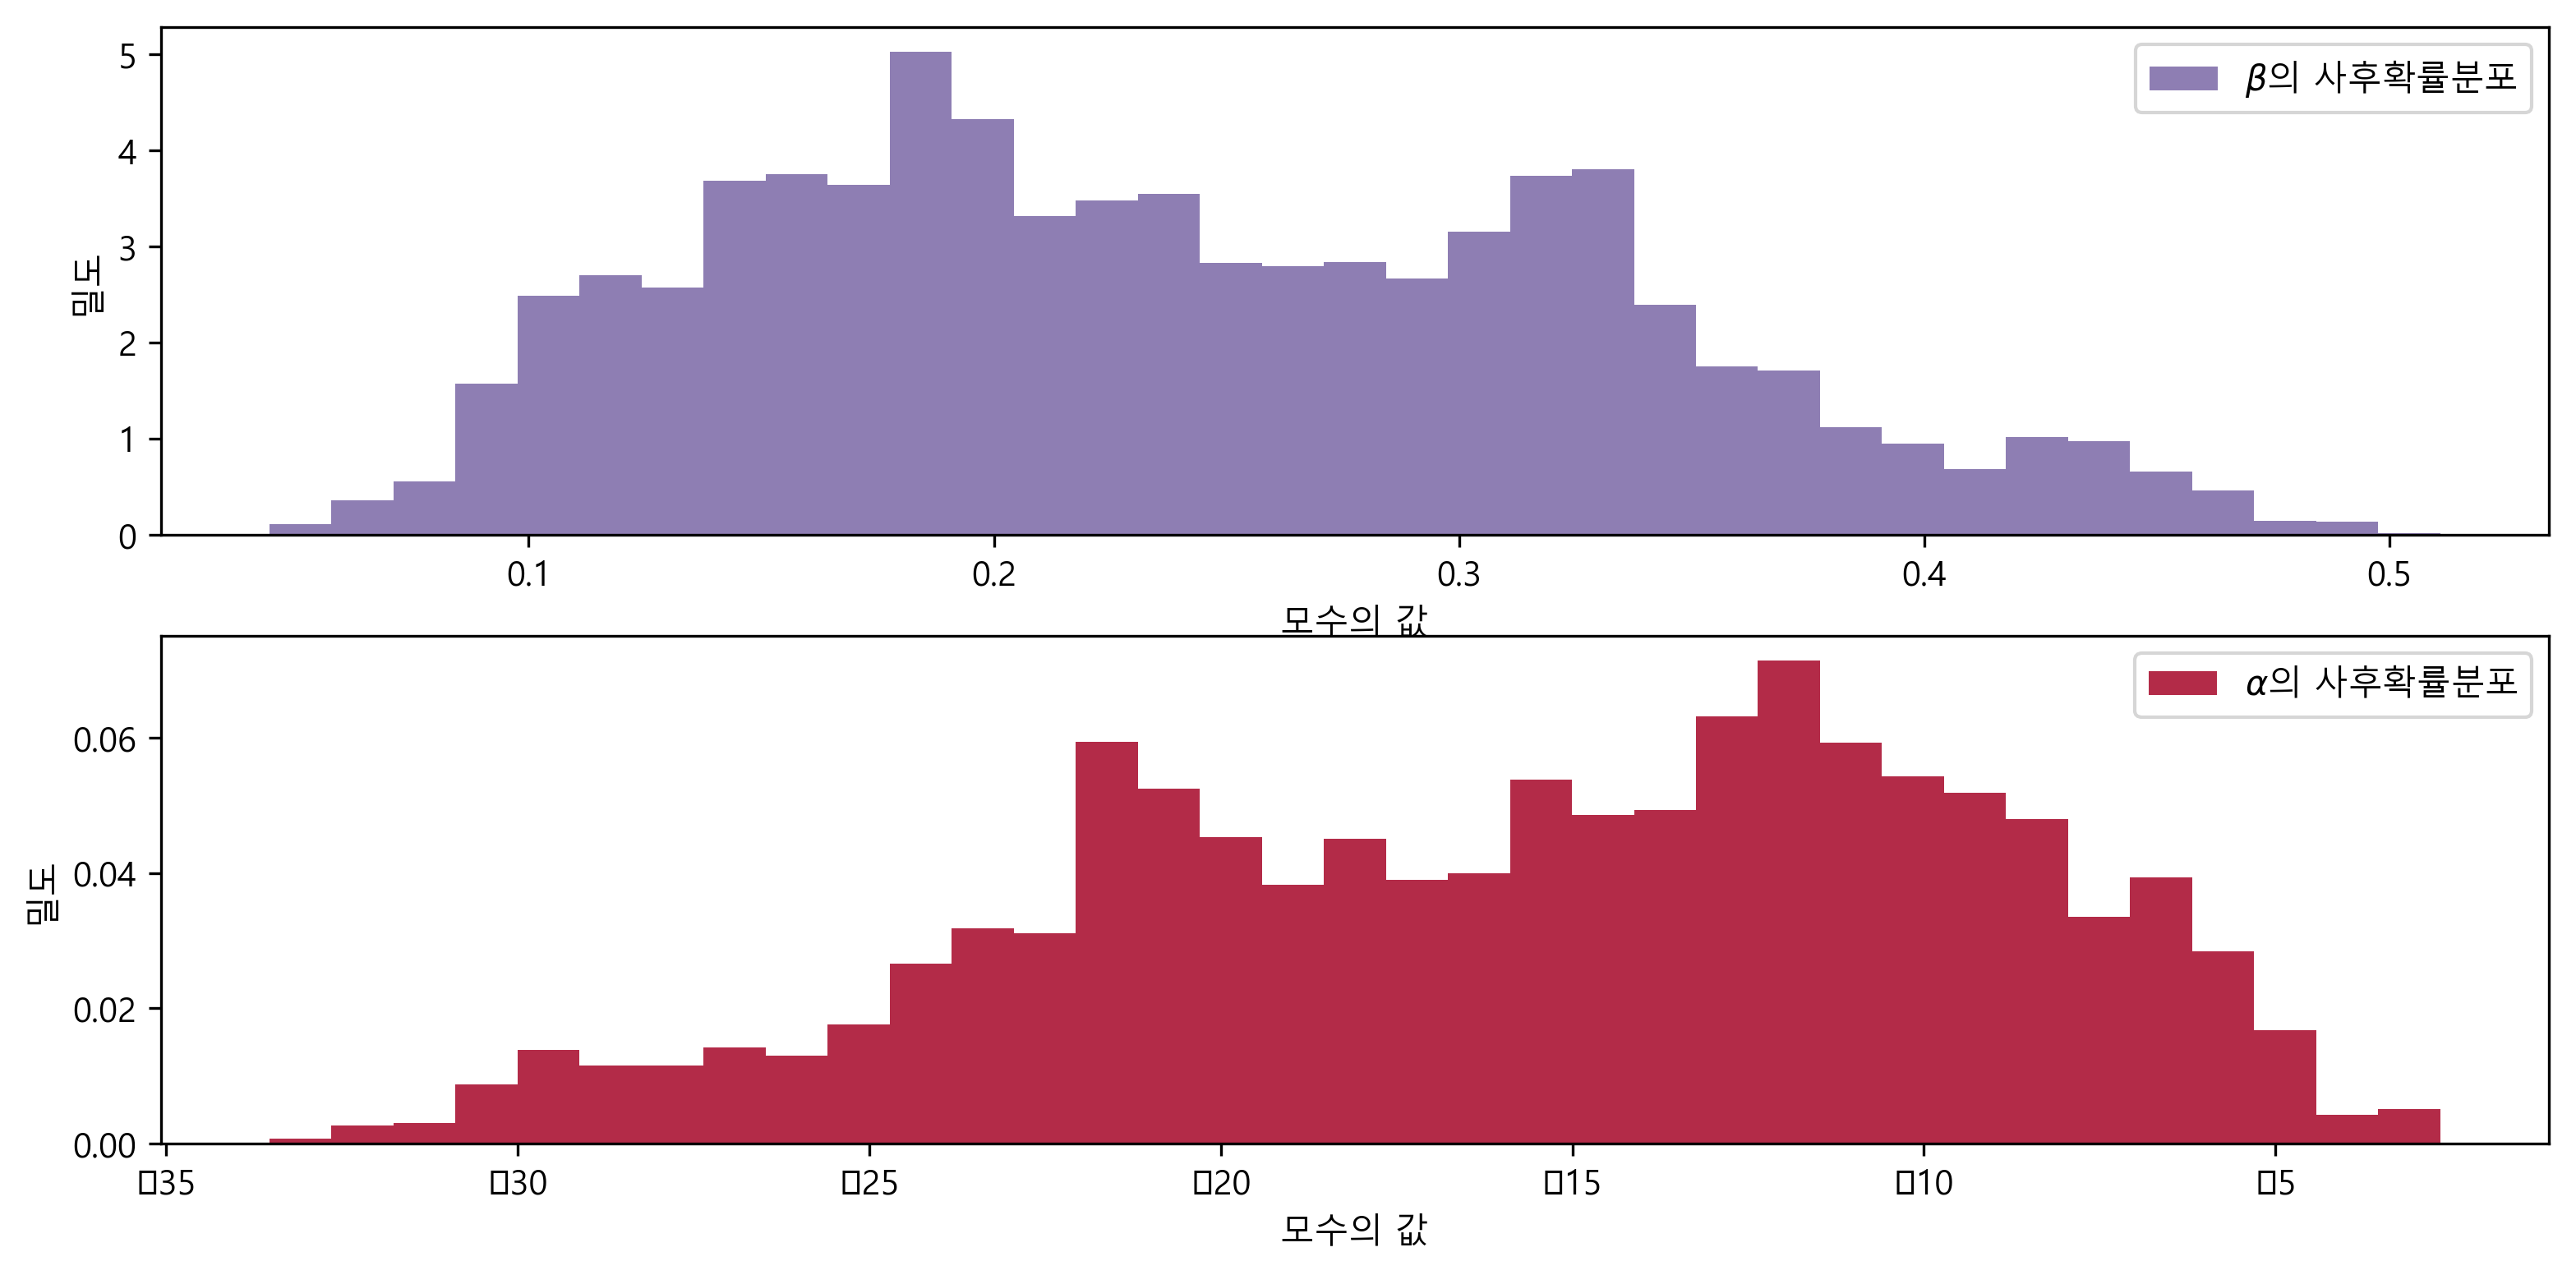

In [50]:
alpha_samples = mcmc.trace('alpha')[:, None]  # 1차원으로 만드는 게 좋다
beta_samples = mcmc.trace('beta')[:, None]

figsize(12.5, 6)

# histogram of the samples:
# 표본의 히스토그램:
plt.subplot(211)
#plt.title(r"모델의 모수 $\alpha$ 와 $\beta$의 사후확률분포")
plt.hist(beta_samples, histtype='stepfilled', bins=35, alpha=0.85,
         label=r"$\beta$의 사후확률분포", color="#7A68A6", normed=True)
plt.xlabel("모수의 값")
plt.ylabel("밀도")
plt.legend()

plt.subplot(212)
plt.hist(alpha_samples, histtype='stepfilled', bins=35, alpha=0.85,
         label=r"$\alpha$의 사후확률분포", color="#A60628", normed=True)
plt.xlabel("모수의 값")
plt.ylabel("밀도")
plt.legend();

In [51]:
t = np.linspace(temperature.min() - 5, temperature.max() + 5, 50)[:, None]
p_t = logistic(t.T, beta_samples, alpha_samples)

mean_prob_t = p_t.mean(axis=0)

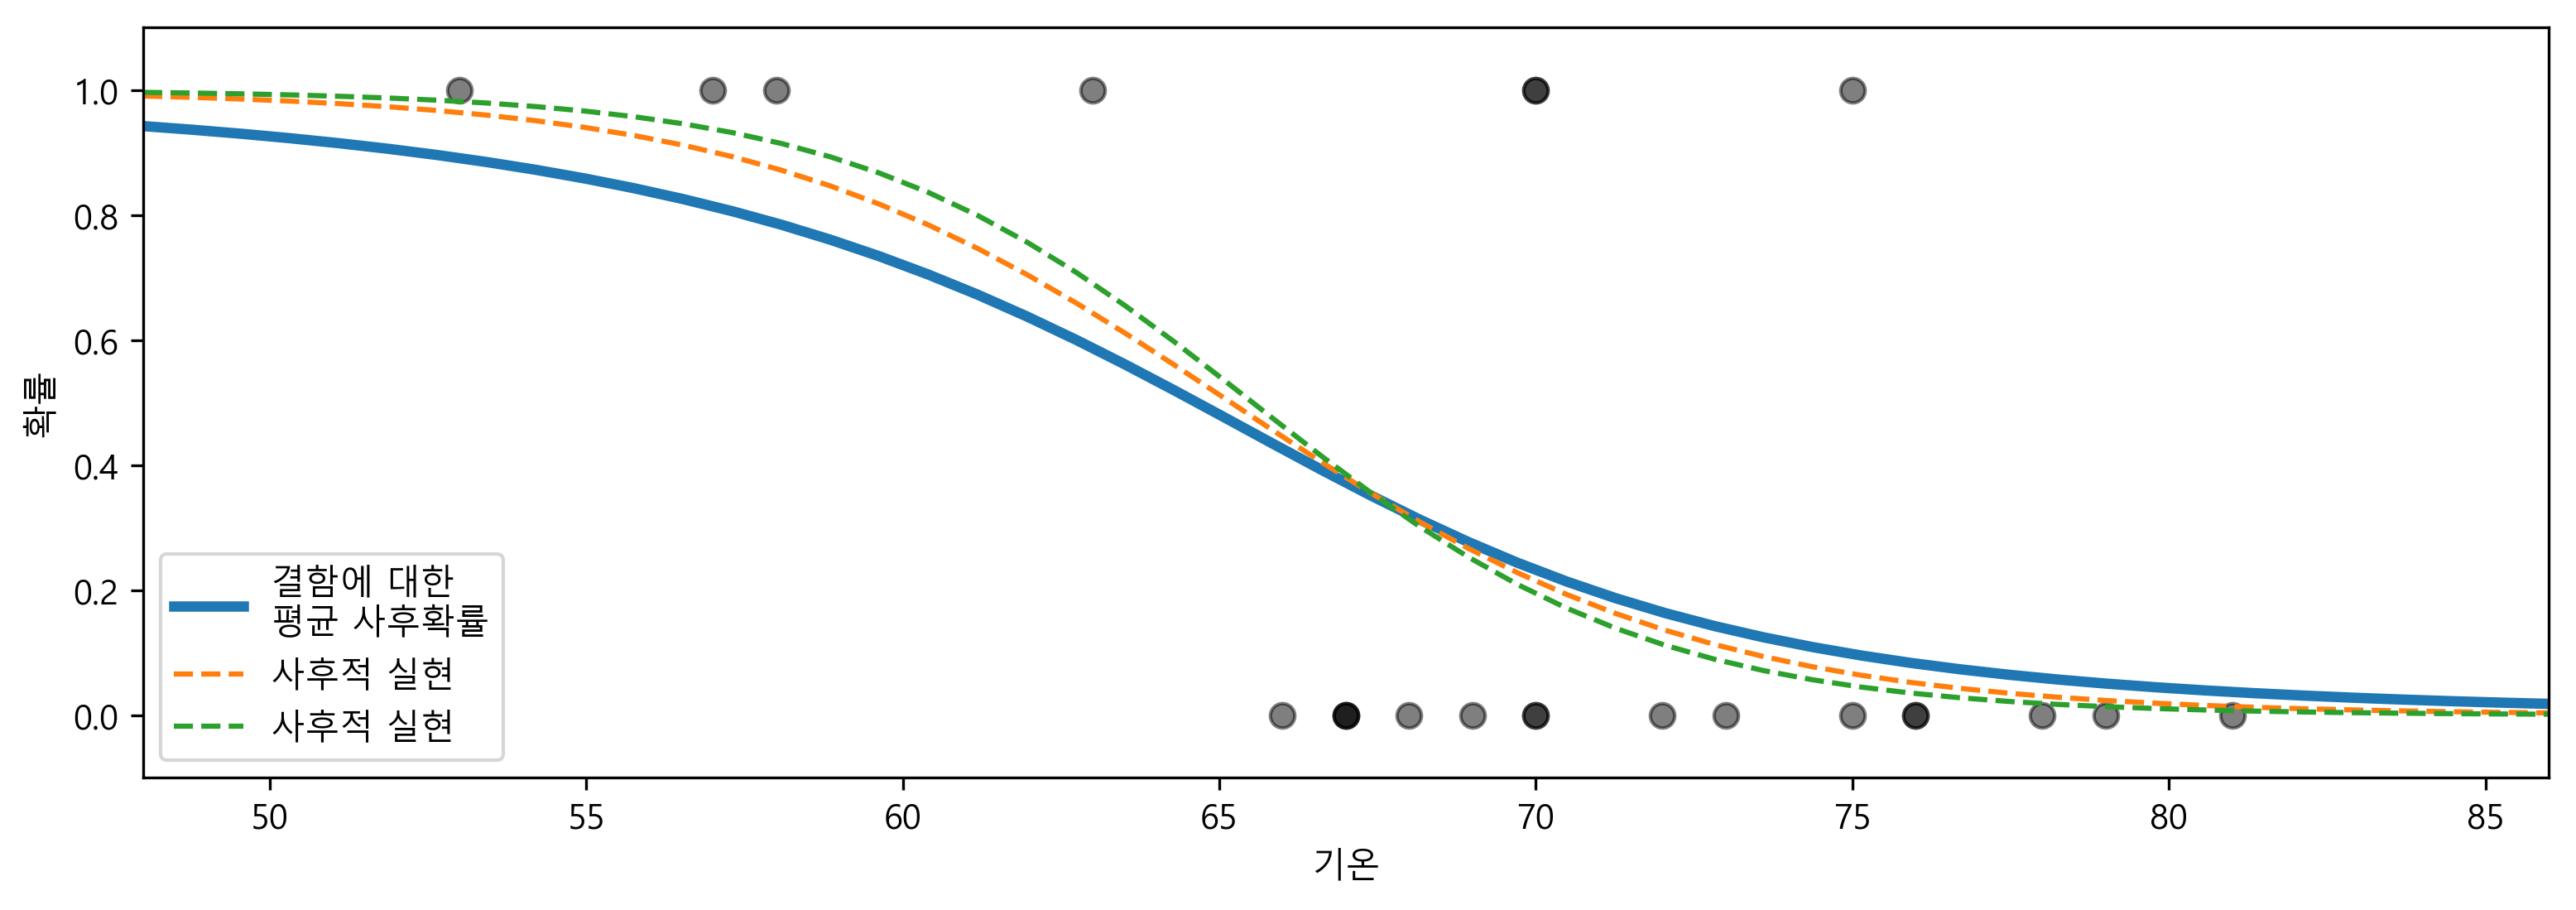

In [52]:
figsize(12.5, 4)

plt.plot(t, mean_prob_t, lw=3, label="결함에 대한 \n평균 사후확률")
plt.plot(t, p_t[0, :], ls="--", label="사후적 실현")
plt.plot(t, p_t[-2, :], ls="--", label="사후적 실현")
plt.scatter(temperature, D, color="k", s=50, alpha=0.5)
#plt.title("두 개의 실현값을 포함한 결함확률에 대한 사후적 기대값")
plt.legend(loc="lower left")
plt.ylim(-0.1, 1.1)
plt.xlim(t.min(), t.max())
plt.ylabel("확률")
plt.xlabel("기온");

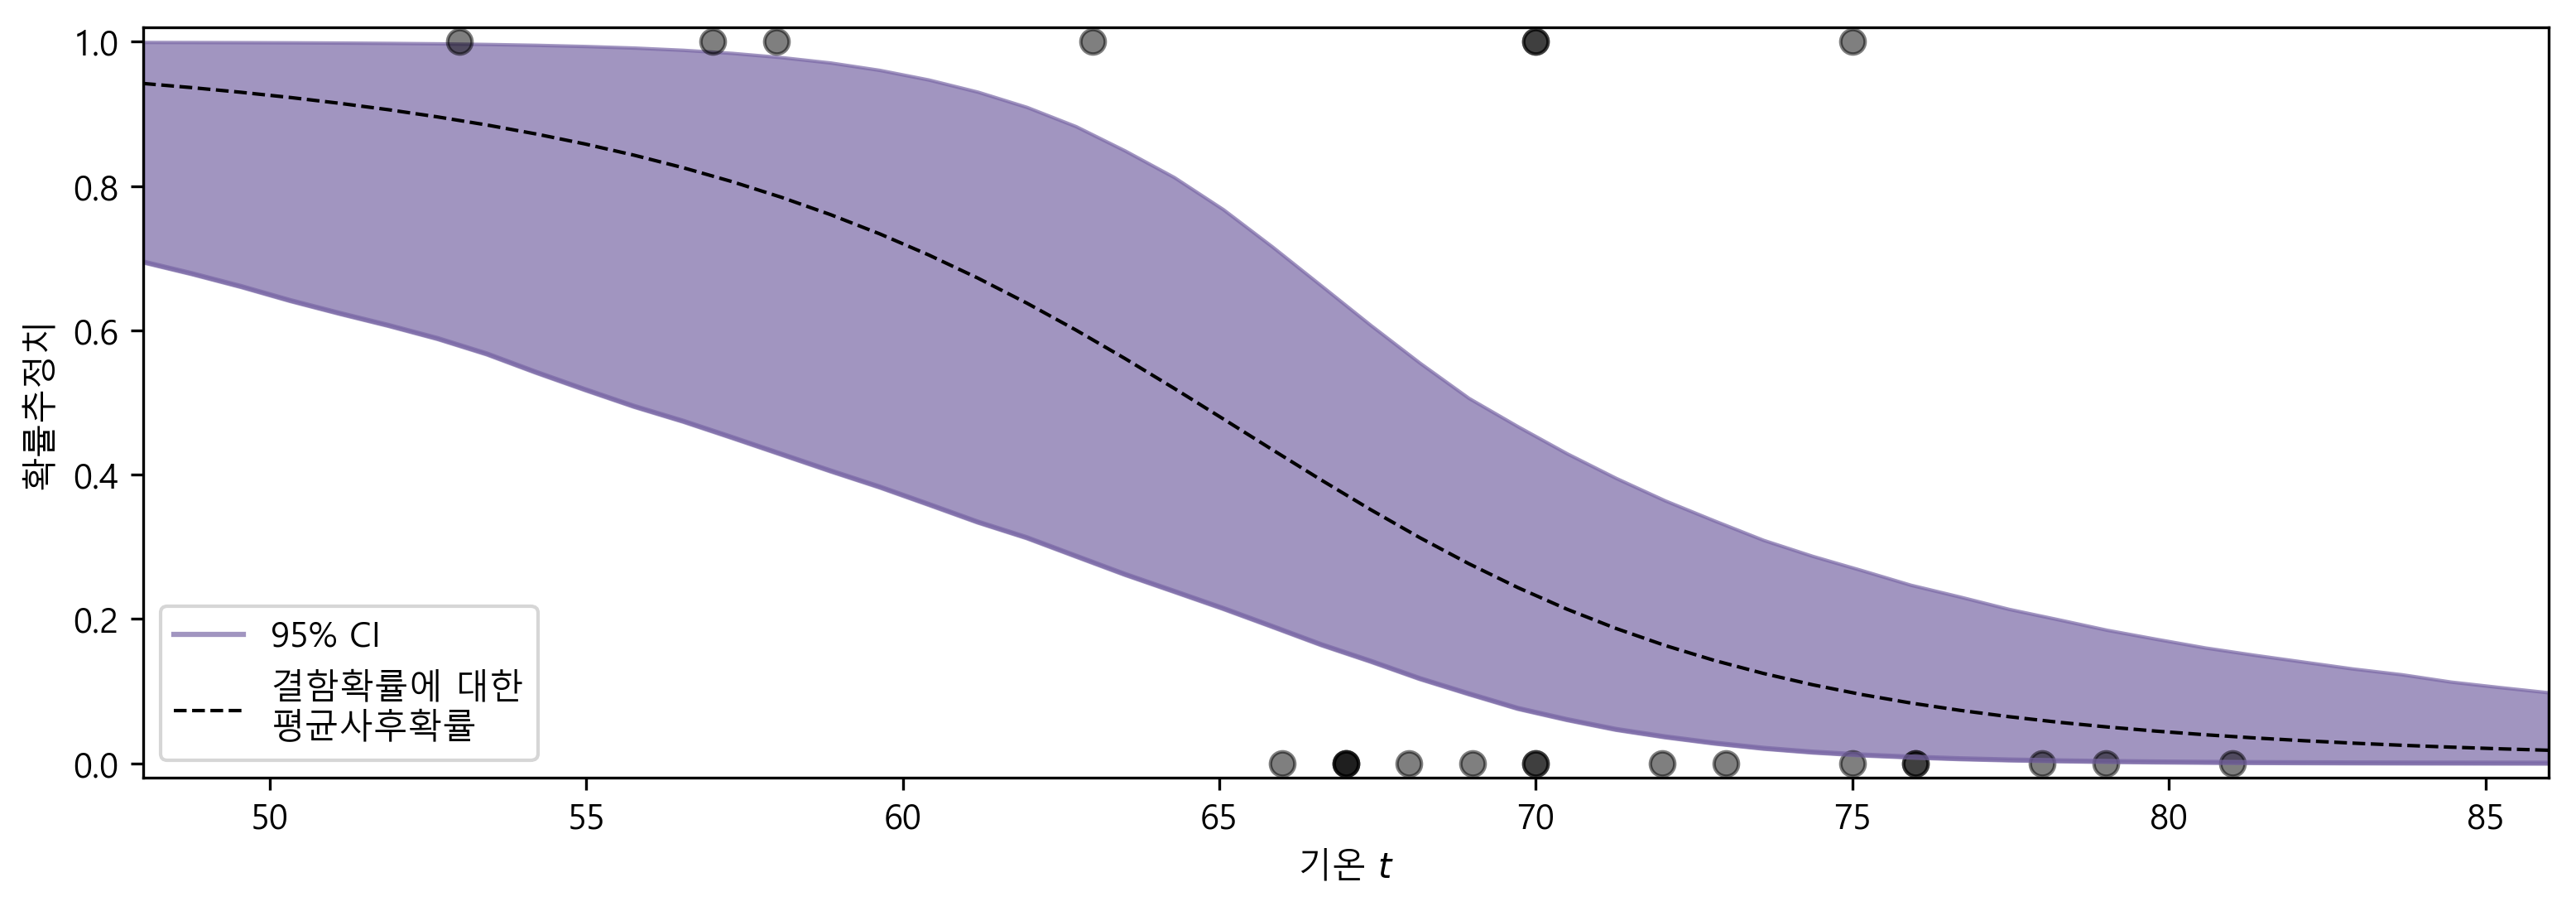

In [53]:
from scipy.stats.mstats import mquantiles

# vectorized bottom and top 2.5% quantiles for "confidence interval"
# 신뢰구간을 위해 맨 아래부터 상위2.5% 퀀타일을 벡터화한다
qs = mquantiles(p_t, [0.025, 0.975], axis=0)
plt.fill_between(t[:, 0], *qs, alpha=0.7,
                 color="#7A68A6")

plt.plot(t[:, 0], qs[0], label="95% CI", color="#7A68A6", alpha=0.7)

plt.plot(t, mean_prob_t, lw=1, ls="--", color="k",
         label="결함확률에 대한\n평균사후확률")

plt.xlim(t.min(), t.max())
plt.ylim(-0.02, 1.02)
plt.legend(loc="lower left")
plt.scatter(temperature, D, color="k", s=50, alpha=0.5)
plt.xlabel("기온 $t$")

plt.ylabel("확률추정치")
#plt.title("주어진 기온$t$에서 추정치의 사후적 확률값");

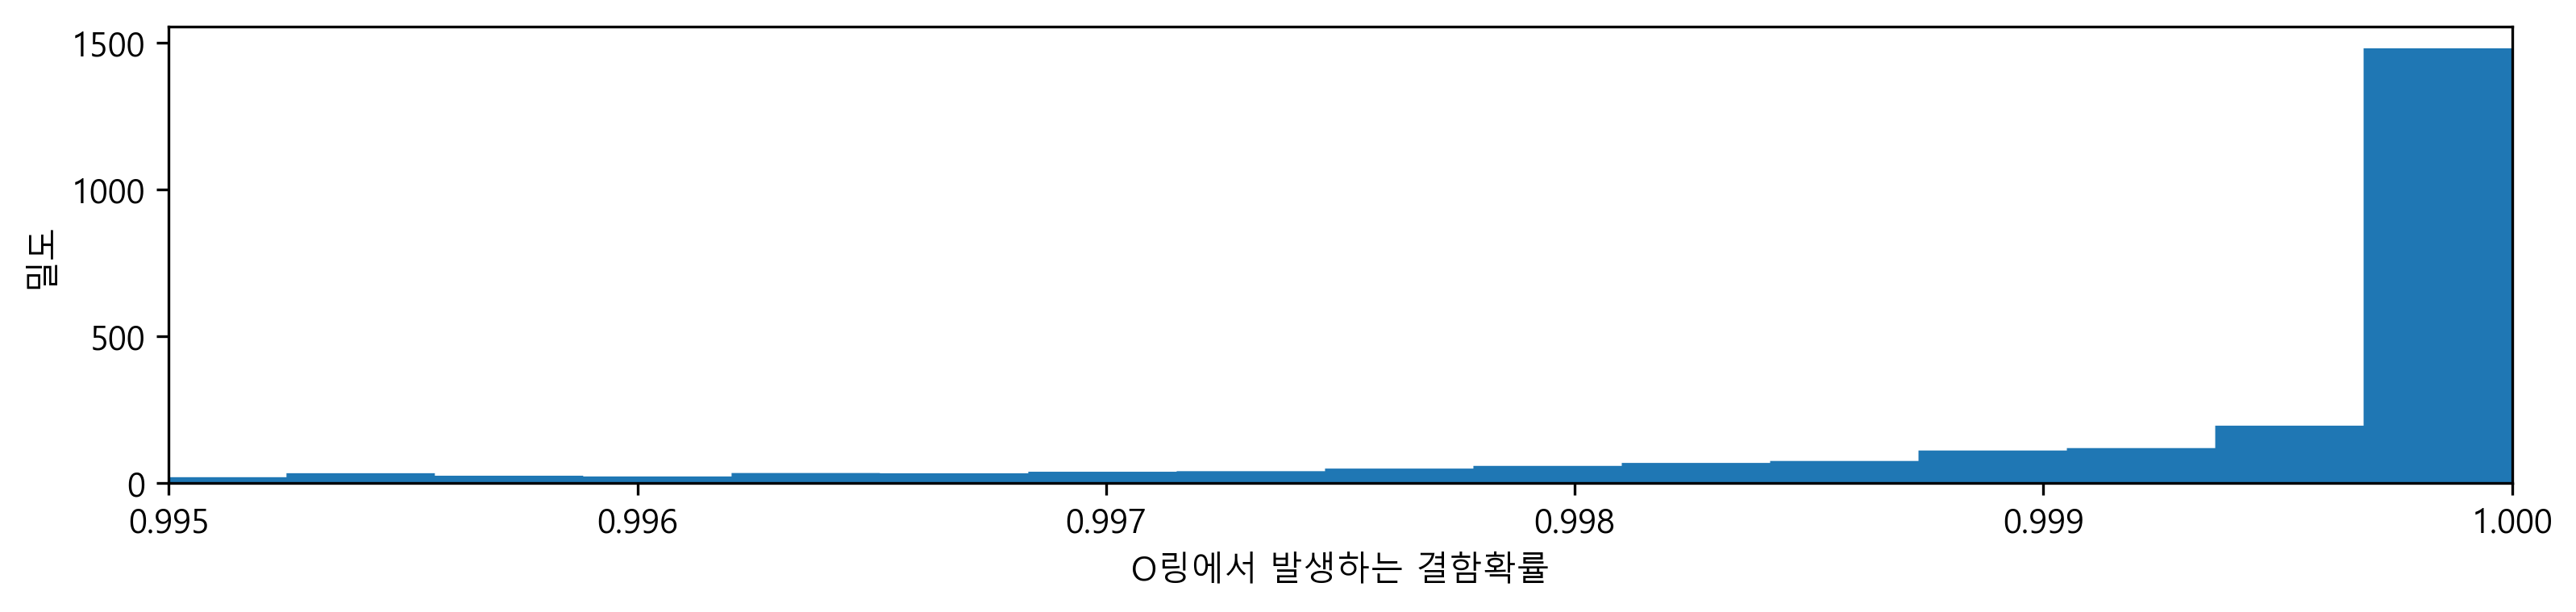

In [54]:
figsize(12.5, 2.5)

prob_31 = logistic(31, beta_samples, alpha_samples)

plt.xlim(0.995, 1)
plt.hist(prob_31, bins=1000, normed=True, histtype='stepfilled')
#plt.title("$t = 31$일 때 결함확률의 사후분포")
plt.ylabel("밀도")
plt.xlabel("O링에서 발생하는 결함확률");

In [55]:
simulated_data = pm.Bernoulli("simulation_data", p)
simulated = pm.Bernoulli("bernoulli_sim", p)
N = 10000
mcmc = pm.MCMC([simulated, alpha, beta, observed])
mcmc.sample(N)

 [-----------------100%-----------------] 10000 of 10000 complete in 1.6 sec

시뮬레이션 배열의 형태: (10000, 23)


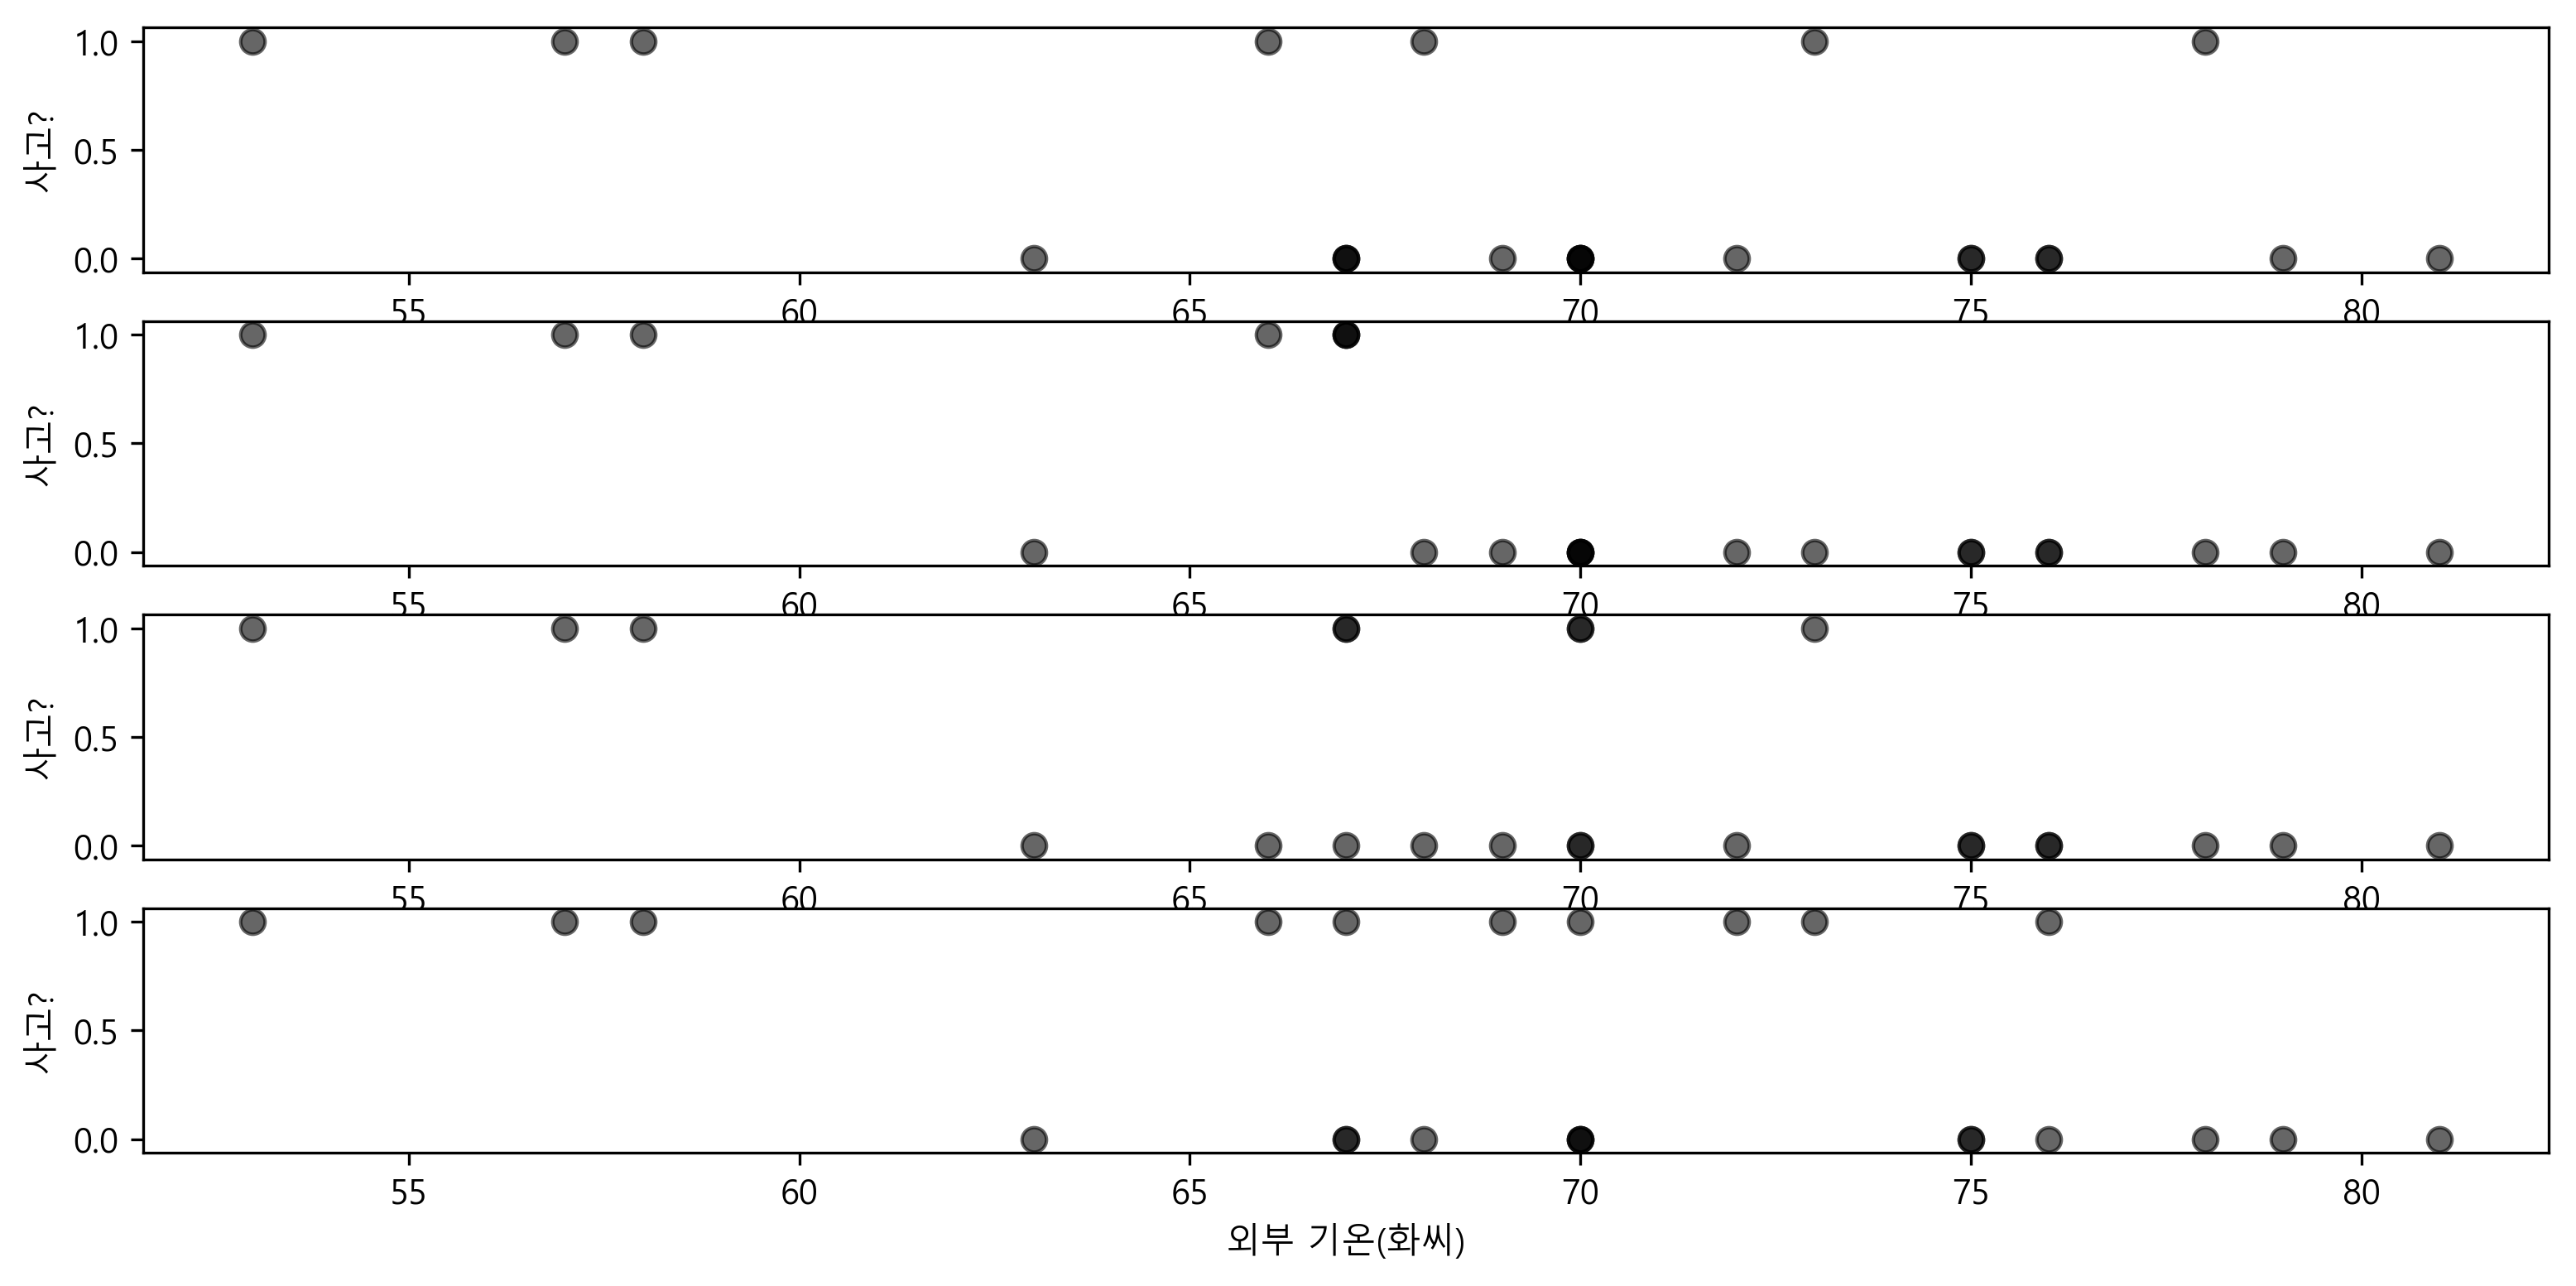

In [56]:
figsize(12.5, 5)

simulations = mcmc.trace("bernoulli_sim")[:].astype(int)
print("시뮬레이션 배열의 형태:", simulations.shape)
#plt.title("사후확률분포의 모수를 사용한 시뮬레이션 데이터셋")

figsize(12.5, 6)
for i in range(4):
    ax = plt.subplot(4, 1, i + 1)
   
    plt.scatter(temperature, simulations[1000 * i, :], color="k",
                s=50, alpha=0.6)
    plt.ylabel("사고?")

    plt.xlabel("외부 기온(화씨)")

In [57]:
posterior_probability = simulations.mean(axis=0)
print("Obs. | Array of Simulated Defects      | Posterior Probability of Defect | Realized Defect ")
for i in range(len(D)):
    print ("%s   | %s| %.2f                            | %d" %
(str(i).zfill(2),str(simulations[:10,i])[:-1] + "...]".ljust(12),
posterior_probability[i], D[i]))

Obs. | Array of Simulated Defects      | Posterior Probability of Defect | Realized Defect 
00   | [1 0 1 1 1 0 0 1 1 0...]        | 0.40                            | 0
01   | [0 0 0 0 0 0 0 1 1 0...]        | 0.18                            | 1
02   | [0 1 0 1 0 0 0 0 0 0...]        | 0.22                            | 0
03   | [1 0 0 0 0 0 0 0 0 1...]        | 0.28                            | 0
04   | [0 0 0 1 0 1 0 0 0 0...]        | 0.33                            | 0
05   | [0 0 0 0 0 0 1 0 0 0...]        | 0.12                            | 0
06   | [1 0 0 0 0 0 0 0 0 0...]        | 0.10                            | 0
07   | [0 0 0 0 1 0 0 0 0 1...]        | 0.18                            | 0
08   | [1 1 1 1 1 1 0 1 1 1...]        | 0.86                            | 1
09   | [0 1 1 1 1 1 1 1 1 1...]        | 0.60                            | 1
10   | [0 0 1 0 0 0 0 0 0 0...]        | 0.19                            | 1
11   | [1 0 0 0 0 0 0 0 0 0...]        | 0.03                

In [58]:
ix = np.argsort(posterior_probability)
print("Posterior Probability of Defect | Realized Defect")
for i in range(len(D)):
    print("%.2f                            | %d" % (posterior_probability[ix[i]], D[ix[i]]))

Posterior Probability of Defect | Realized Defect
0.02                            | 0
0.02                            | 0
0.03                            | 0
0.04                            | 0
0.05                            | 0
0.06                            | 0
0.06                            | 1
0.10                            | 0
0.12                            | 0
0.18                            | 0
0.18                            | 1
0.19                            | 1
0.19                            | 0
0.22                            | 0
0.28                            | 0
0.33                            | 0
0.33                            | 0
0.34                            | 0
0.40                            | 0
0.60                            | 1
0.83                            | 1
0.86                            | 1
0.94                            | 1


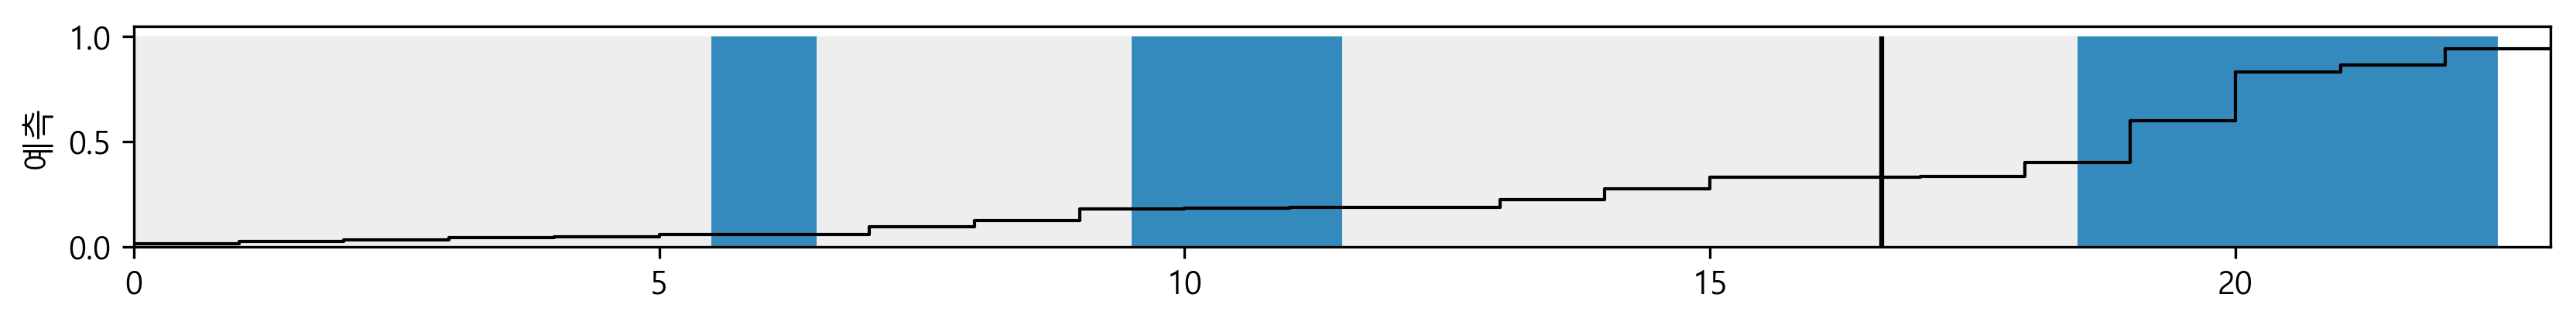

In [59]:
#import separation_plot
from separation_plot import separation_plot


figsize(11, 1.5)
separation_plot(posterior_probability, D)
#plt.title("기온 종속적 모델")
#원서 코드에는 없지만 원서 코드 결과 그림에는 있음...
plt.ylabel("예측")

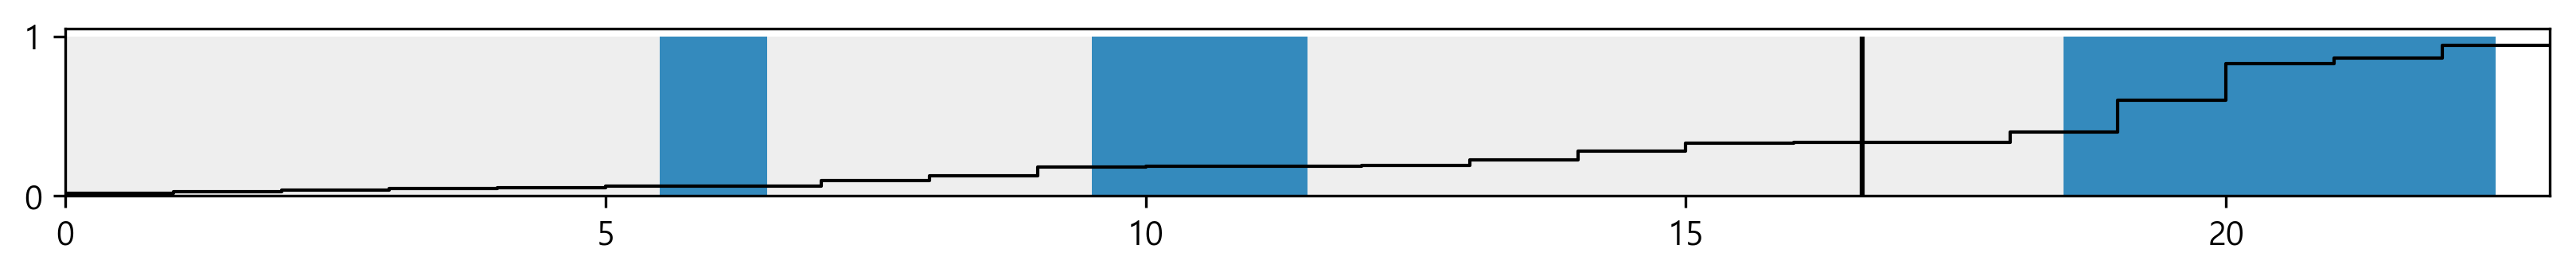

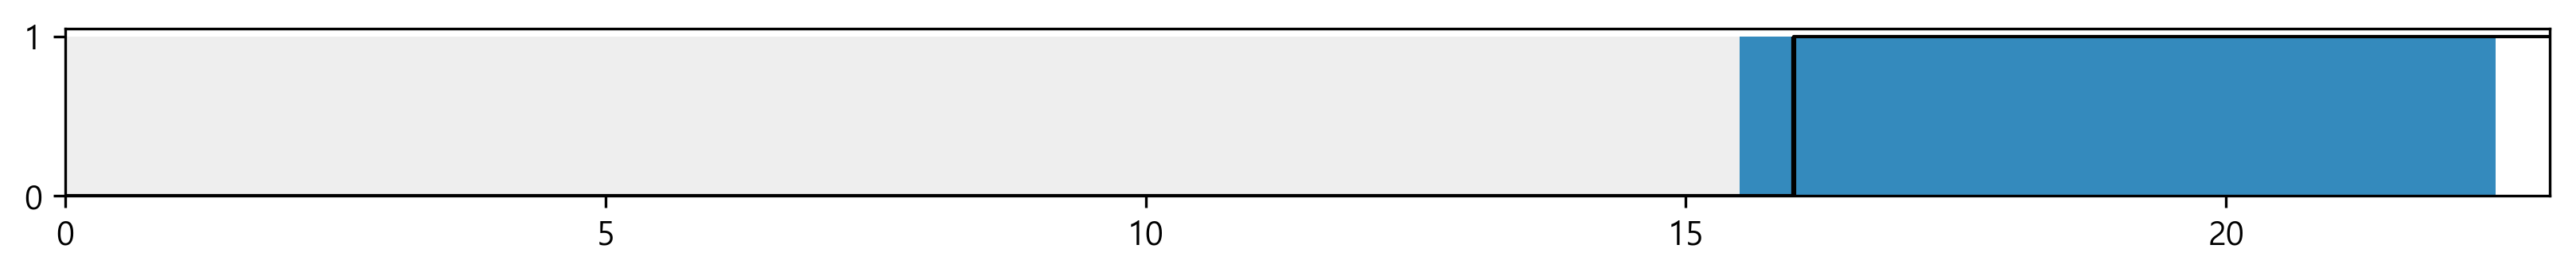

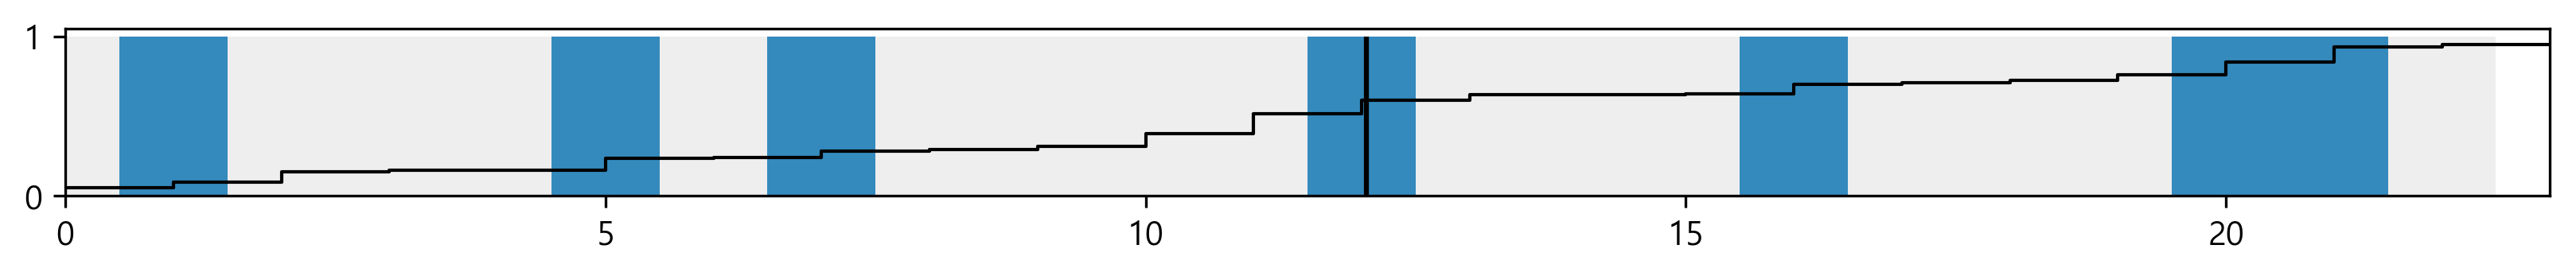

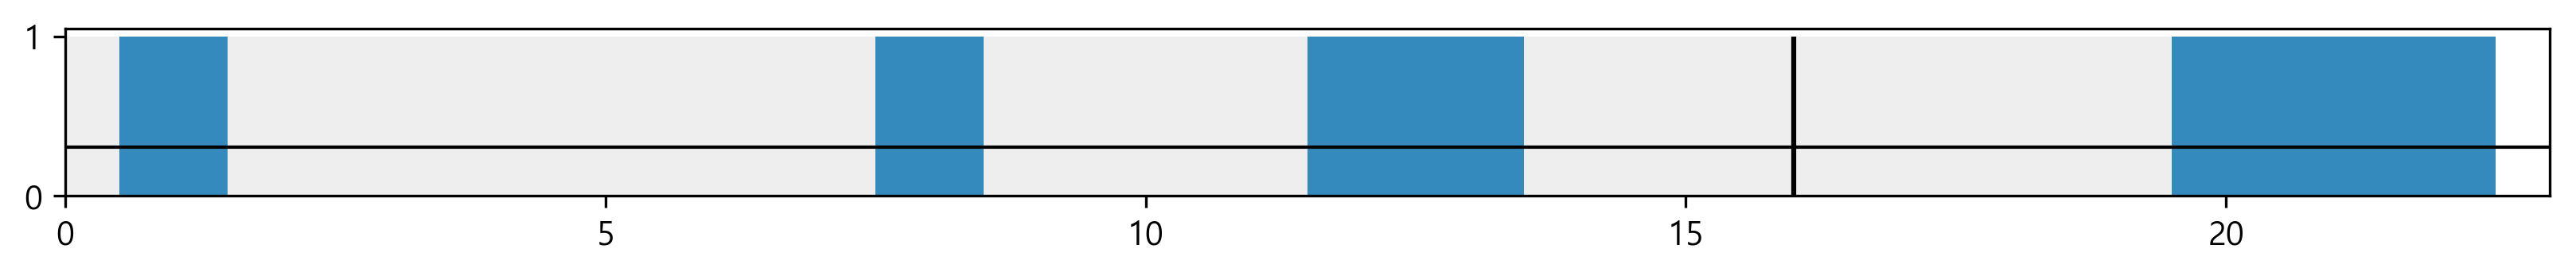

In [60]:
figsize(11, 1.25)

# Our temperature-dependent model
# 기온 종속적 모델
separation_plot(posterior_probability, D)
#plt.title("기온 종속적 모델")

# Perfect model
# i.e. the probability of defect is equal to if a defect occurred or not.
# 퍼펙트모델
# 즉 결함의 확률은 결함이 발생여부와 동일하다
p = D
separation_plot(p, D)
#plt.title("퍼펙트 모델")

# random predictions
# 랜덤예측모델
p = np.random.rand(23)
separation_plot(p, D)
#plt.title("랜덤 모델")

# constant model
# 상수모델
constant_prob = 7. / 23 * np.ones(23)
separation_plot(constant_prob, D)
#plt.title("상수-예측모델");

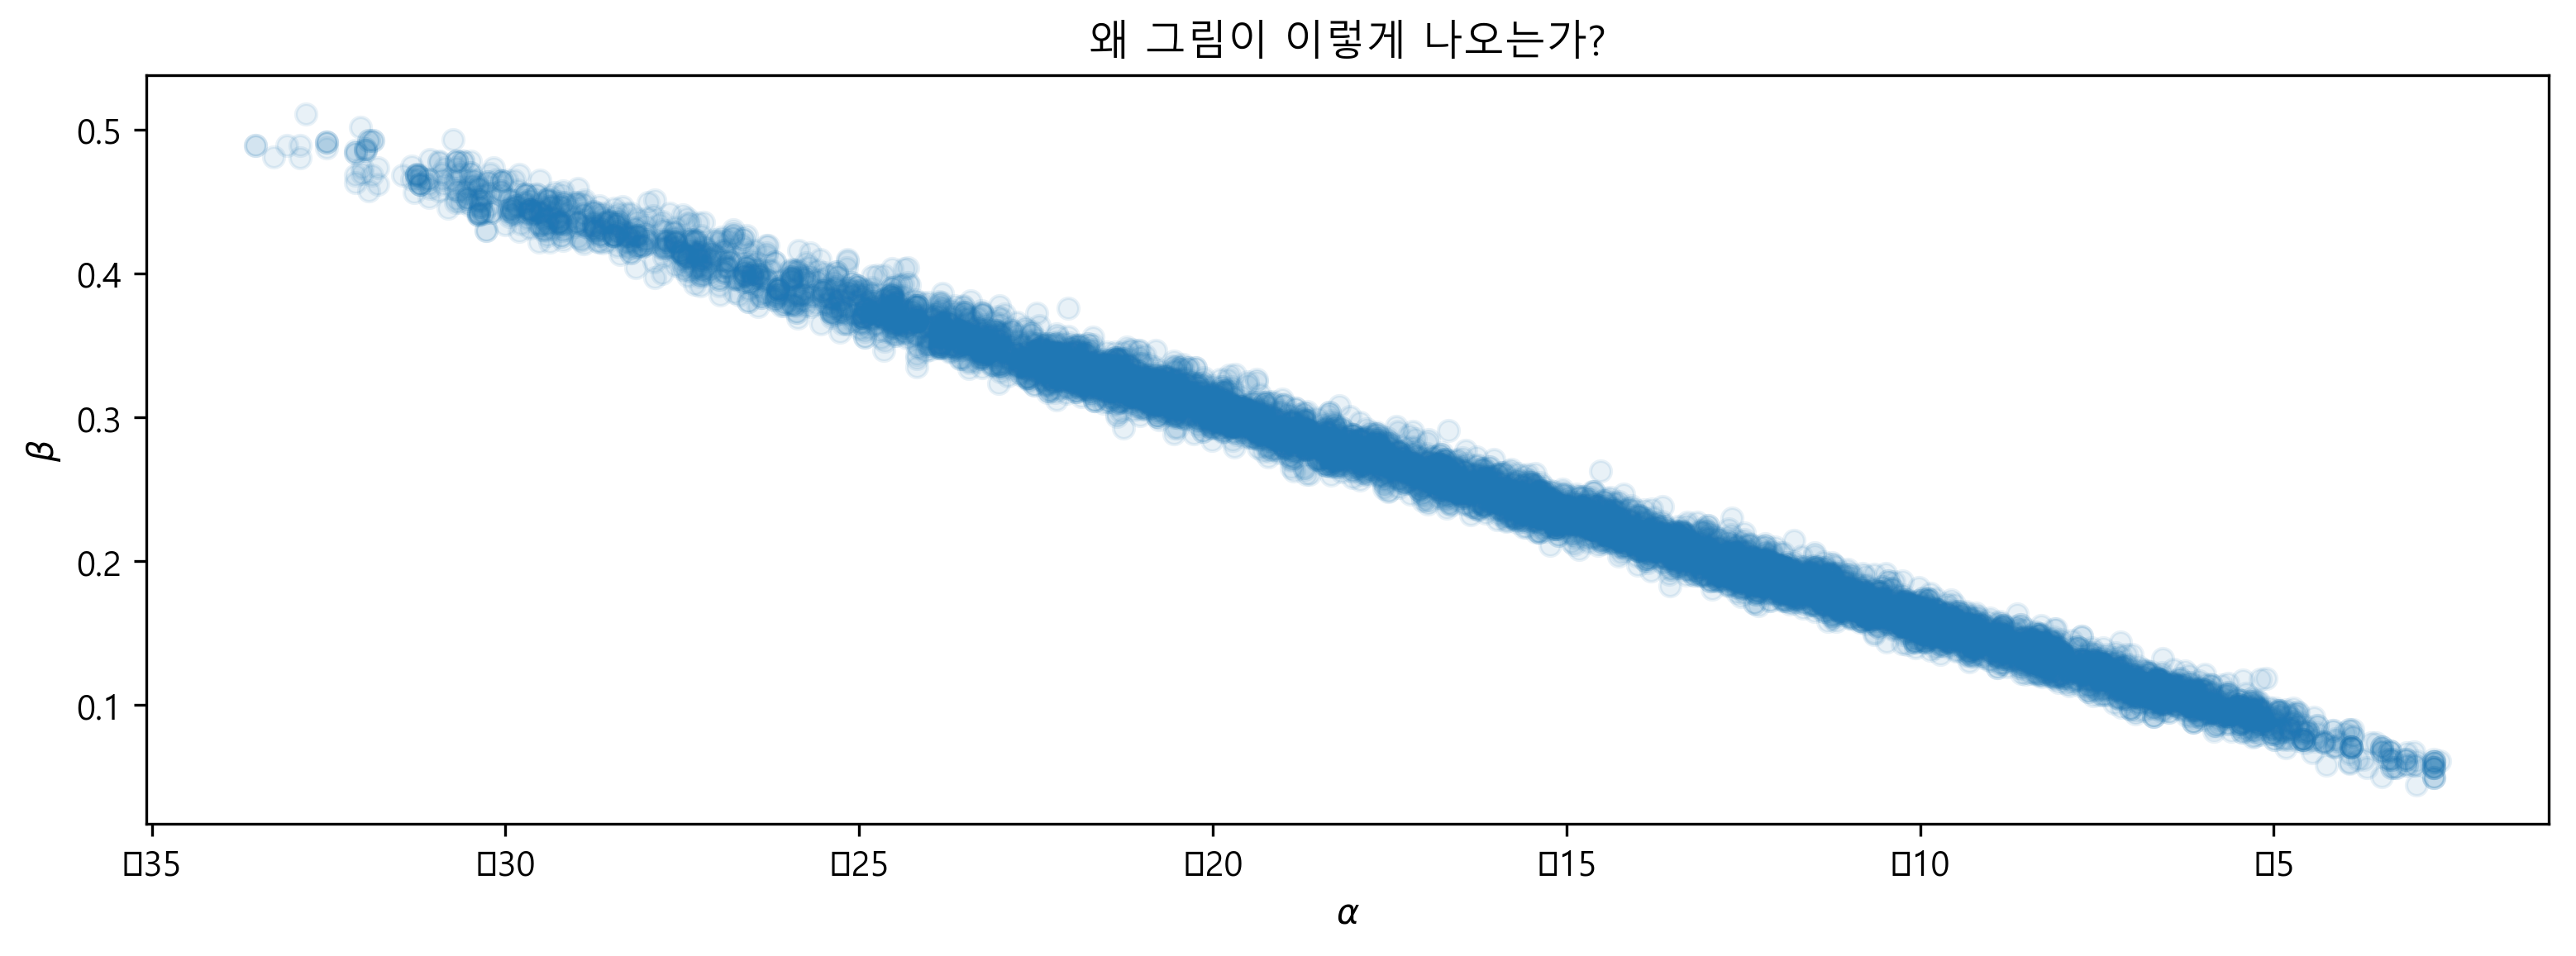

In [61]:
# type your code here.
figsize(12.5, 4)

plt.scatter(alpha_samples, beta_samples, alpha=0.1)
plt.title("왜 그림이 이렇게 나오는가?")
plt.xlabel(r"$\alpha$")
plt.ylabel(r"$\beta$")